In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [2]:
import locale
import calendar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

In [14]:
df_fifa_latest_rank = pd.read_csv('latest-fifa-world-ranking.csv')
df_fifa_latest_rank[df_fifa_latest_rank.country_code=='FRA'].ranking.values[0] - df_fifa_latest_rank[df_fifa_latest_rank.country_code=='ROU'].ranking.values[0]

2

In [3]:
# Load databases

# Team final rankings at each WC
df_rank = pd.read_csv('wc_rankings.csv')
# Germany considers West Germany as a part of their footballing history (not East Germany)
df_rank = df_rank.replace(to_replace="West Germany", value="Germany")

# Record transfer fees paid
locale.setlocale(locale.LC_NUMERIC, '')
df_tranfer = pd.read_csv("record_transfers.csv")
df_tranfer['fee_pounds'] = df_tranfer.fee_pounds.apply(locale.atof)

# 
df_squads = pd.read_csv('wc_squads.csv')
df_squads = df_squads.replace(to_replace="Korea Republic", value="South Korea")
df_squads = df_squads.replace(to_replace="West Germany", value="Germany")
df_squads = df_squads.replace(to_replace="Dutch East Indies (Indonesia)", value="Dutch East Indies")
df_squads.dob = pd.to_datetime(df_squads.dob)
df_squads['birth_month'] = df_squads.dob.map(lambda x: x.month)

df_league_data = pd.read_csv("top_five_leagues.csv")
df_club_elo = pd.read_csv("wc_elo.csv")

df_WDI = pd.read_csv('WDI_Data.csv')

df_CC = pd.read_csv('WDI_Country.csv')

df_fifa_rankings = pd.read_csv('fifa-world-ranking.csv')
df_fifa_rankings.date = df_fifa_rankings.date.replace('1993-08-08', '1993-08-01')
df_fifa_rankings.date = pd.to_datetime(df_fifa_rankings.date)
df_fifa_rankings = df_fifa_rankings.set_index('date')
df_international_matches = pd.read_csv('fifa-matches.csv')
df_international_matches.date = pd.to_datetime(df_international_matches.date)
df_international_matches = df_international_matches.set_index('date')

In [4]:
# # Put fifa rankings (at the time) for each team playing in a match
# ranking_groupby = df_fifa_rankings.groupby('country_code')

# match_and_ranking = []
# # date, home_ctry, home_ctry_code, away_ctry, away_ctry_code, home_score, away_score, penalties, venue, home_rank, away_rank
# for row in df_international_matches.iterrows():
#     date = row[0].date().isoformat()
#     home_ctry = row[1][0]
#     home_ctry_code = row[1][1]
#     away_ctry  = row[1][2]
#     away_ctry_code = row[1][3]
#     home_score = row[1][4]
#     away_score = row[1][5]
#     penalties = row[1][6]
#     venue = row[1][7]
#     home_rank = ranking_groupby.get_group(home_ctry_code).ranking.asof(row[0])
#     away_rank = ranking_groupby.get_group(away_ctry_code).ranking.asof(row[0])
#     home_pts = ranking_groupby.get_group(home_ctry_code).points.asof(row[0])
#     away_pts = ranking_groupby.get_group(away_ctry_code).points.asof(row[0])
#     home_confed = ranking_groupby.get_group(home_ctry_code).confederation.asof(row[0])
#     away_confed = ranking_groupby.get_group(away_ctry_code).confederation.asof(row[0])
#     result = [date, home_ctry, home_ctry_code, away_ctry, away_ctry_code, home_score, away_score, penalties, venue, home_rank, away_rank, home_pts, away_pts, home_confed, away_confed]
#     match_and_ranking.append(result)

# df = pd.DataFrame(match_and_ranking, columns=['date','home_ctry','home_ctry_code','away_ctry','away_ctry_code','home_score','away_score','penalties','venue', 'home_rank', 'away_rank', 'home_pts', 'away_pts', 'home_confed', 'away_confed'])
        
# df.to_csv('fifa-match-and-rank.csv', index=False, encoding='utf-8')

In [6]:
# df_match_rank = pd.read_csv('fifa-match-and-rank.csv')
# df_match_rank['rank_diff'] = df_match_rank.home_rank - df_match_rank.away_rank
# df_match_rank['rank_diff_from_higher'] = df_match_rank.rank_diff.abs()
# df_match_rank.home_pts
# df_match_rank.home_pts = df_match_rank.home_pts.apply(fix_points)
# df_match_rank.away_pts = df_match_rank.away_pts.apply(fix_points)
# df_match_rank.home_pts = pd.to_numeric(df_match_rank.home_pts)
# df_match_rank.away_pts = pd.to_numeric(df_match_rank.away_pts)

# df_match_rank['pts_diff'] = df_match_rank.home_pts - df_match_rank.away_pts
# df_match_rank['pts_diff_from_higher'] = df_match_rank.pts_diff.abs()

In [7]:
# df_match_rank['home_goal_diff'] = df_match_rank.home_score - df_match_rank.away_score

In [8]:
def home_team_wdl(row):
    if row['home_goal_diff'] == 0:
        return 'D'
    elif row['home_goal_diff'] > 0:
        return 'W'
    elif row['home_goal_diff'] < 0 :
        return 'L'

def away_team_wdl(row):
    if row['home_goal_diff'] == 0:
        return 'D'
    elif row['home_goal_diff'] > 0:
        return 'L'
    elif row['home_goal_diff'] < 0 :
        return 'W'

def higher_rank_wdl(row):
    if row['rank_diff']>0: # home team is lower rank
        return row['away_result']
    else:
        return row['home_result']

In [9]:
# df_match_rank['home_result'] = df_match_rank.apply(lambda row: home_team_wdl(row), axis=1)
# df_match_rank['away_result'] = df_match_rank.apply(lambda row: away_team_wdl(row), axis=1)
# df_match_rank['higher_rank_res'] = df_match_rank.apply(lambda row: higher_rank_wdl(row), axis=1)
# df_match_rank = df_match_rank.drop('home_goal_diff', 1)

In [10]:
# ranking_w_pct = df_match_rank.groupby('rank_diff_from_higher').higher_rank_res.value_counts(normalize=True).to_frame()
# df = ranking_w_pct.unstack(level=0)
# df = df.unstack().fillna(0).reset_index()
# df = df.drop('level_0', axis=1)

In [11]:
# df.columns = [u'rank_diff_from_higher', u'higher_rank_res', 'prob']
# higher_rank_win = df[df['higher_rank_res']=='W']
# lower_rank_win = df[df['higher_rank_res']=='L']
# draw = df[df['higher_rank_res']=='D']

In [12]:
# df[df['higher_rank_res']=='D']

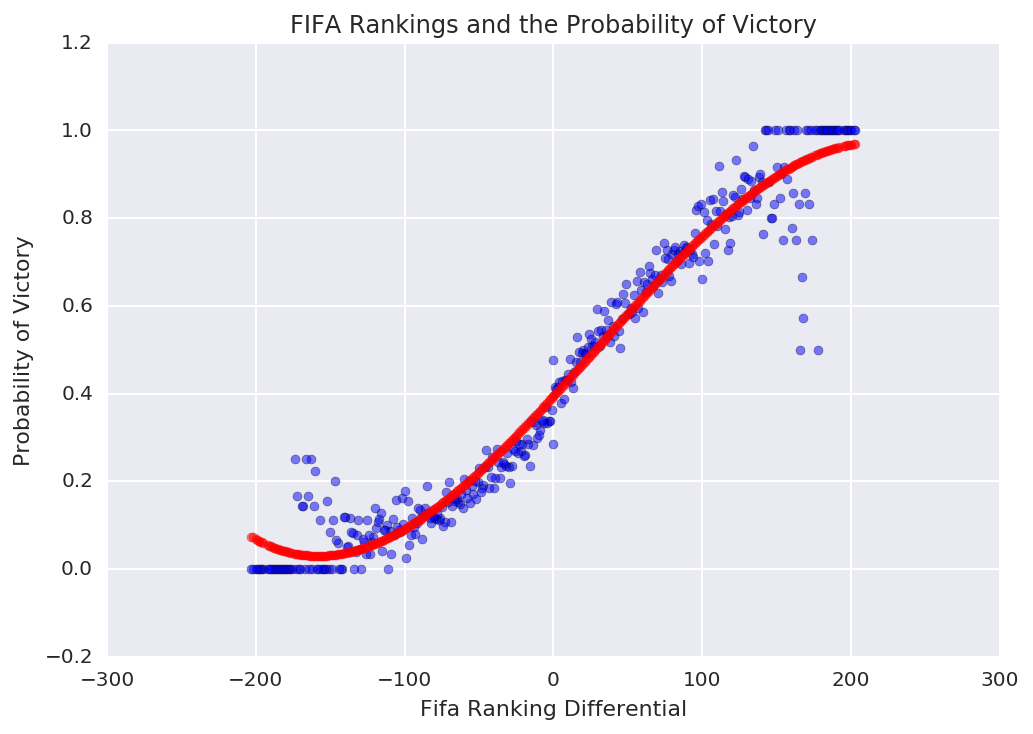

In [71]:
# higher_df = pd.DataFrame()
# lower_df = pd.DataFrame()
# higher_df['rank_diff'] = higher_rank_win.rank_diff_from_higher
# higher_df['prob'] = higher_rank_win.prob
# lower_df['rank_diff'] = lower_rank_win.rank_diff_from_higher*-1
# lower_df['prob'] = lower_rank_win.prob
# p_win = pd.concat([higher_df, lower_df])
# p_win.to_csv('prob_win.csv')
p_win = pd.read_csv('prob_win.csv')
z = np.polyfit(p_win.rank_diff, p_win.prob, 3)
f = np.poly1d(z)
test_data = f(p_win.rank_diff)
plt.scatter(p_win.rank_diff, p_win.prob, alpha=0.5)
plt.scatter(p_win.rank_diff, test_data, alpha=0.5, color='red')
plt.xlabel('Fifa Ranking Differential');
plt.ylabel(u'Probability of Victory');
plt.title(u'FIFA Rankings and the Probability of Victory');

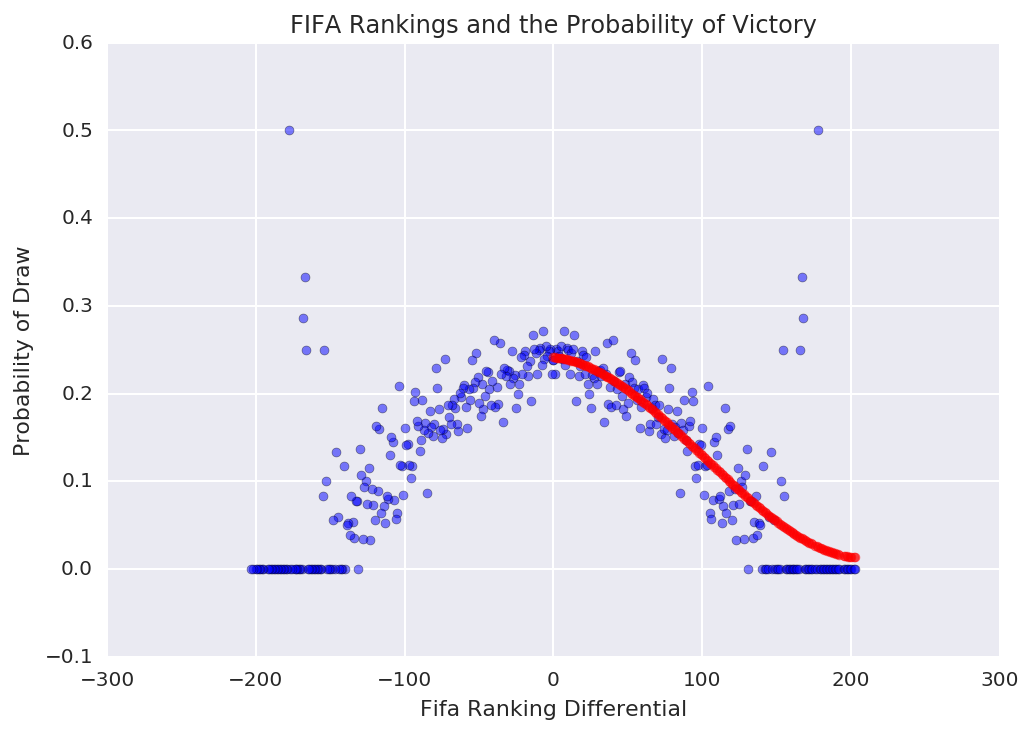

In [85]:
p_draw = pd.read_csv('prob_draw.csv')
z = np.polyfit(p_draw.rank_diff.values, p_draw.prob.values, 3)
f = np.poly1d(z)
test_data = f(p_draw.rank_diff)
plt.scatter(p_draw.rank_diff, p_draw.prob, alpha=0.5)
plt.scatter(p_draw.rank_diff*-1, p_draw.prob, alpha=0.5)
plt.scatter(p_draw.rank_diff, test_data, alpha=0.5, color='red')
plt.xlabel('Fifa Ranking Differential');
plt.ylabel(u'Probability of Draw');
plt.title(u'FIFA Rankings and the Probability of Victory');

In [14]:
rem_idx = []
rem_idx += p_win[p_win.rank_diff < -150][p_win[p_win.rank_diff < -150].prob > 0.1].index.tolist()
rem_idx += p_win[p_win.rank_diff > 150][p_win[p_win.rank_diff > 150].prob < 0.9].index.tolist()
# for val in p_win[p_win.rank_diff < -150]:
#     print val
#     if val.prob > 0.1:
#         rem_idx.append(val.index)
# for val in p_win[p_win.rank_diff > -150]:
#     if val.prob < 0.9:
#         rem_idx.append(val.index)
# p_win[p_win.rank_diff > 140]

In [15]:
p_win1 = p_win.copy(deep=True)
p_win1 = p_win1.drop(p_win1.index[rem_idx])

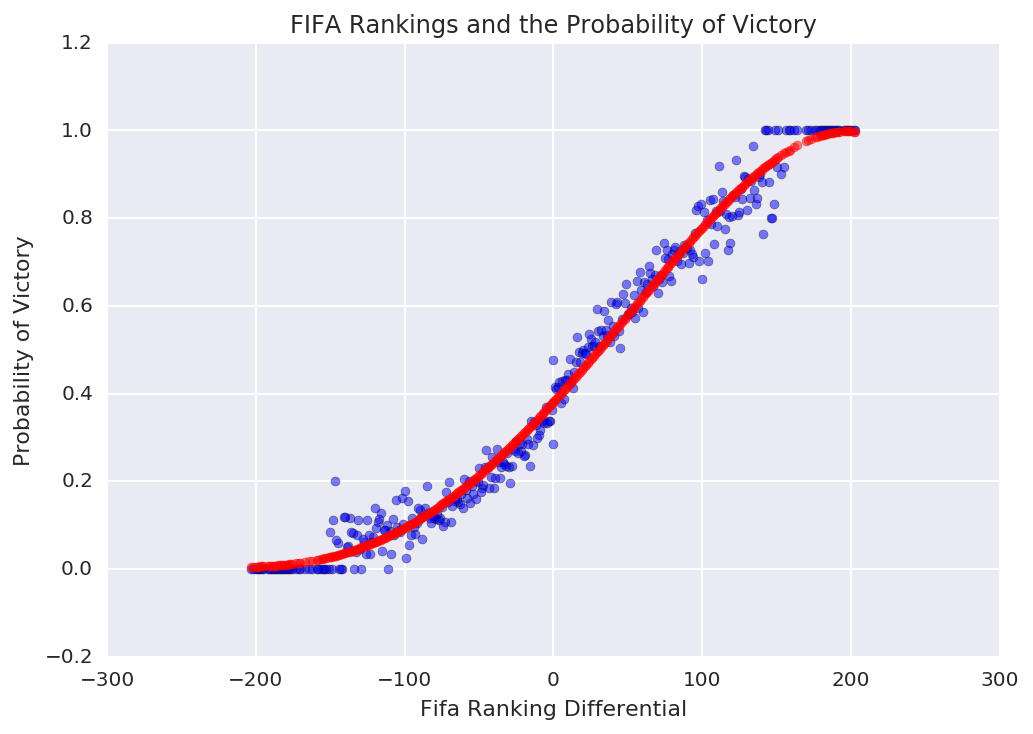

In [93]:
z = np.polyfit(p_win1.rank_diff, p_win1.prob, 4)
f = np.poly1d(z)
test_data = f(p_win1.rank_diff)
plt.scatter(p_win1.rank_diff, p_win1.prob, alpha=0.5)
plt.scatter(p_win1.rank_diff, test_data, alpha=0.5, color='red')
plt.xlabel('Fifa Ranking Differential');
plt.ylabel(u'Probability of Victory');
plt.title(u'FIFA Rankings and the Probability of Victory');

In [16]:
X = p_win1.rank_diff
y = p_win1.prob

In [42]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors.kde import KernelDensity
from sklearn.svm import SVR
import numpy as np
from scipy.optimize import curve_fit
# np.vstack(X).T.shape
# np.vstack(y).shape
# y.reshape((400,1)).astype(float).T[0]
X_train = X.reshape((len(X),1)).astype(int)
y_train = np.asarray(y.values, dtype="|S6")
# ,list(y.values)
log_regress_1 = LogisticRegression(solver="newton-cg", multi_class="multinomial", C=1e10, tol=1e-10).fit(X_train, y_train)

# log_regress_2 = curve_fit(kernel='rbf', C=1e10).fit(X_train, y_train)
# kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_train, y_train) 

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')

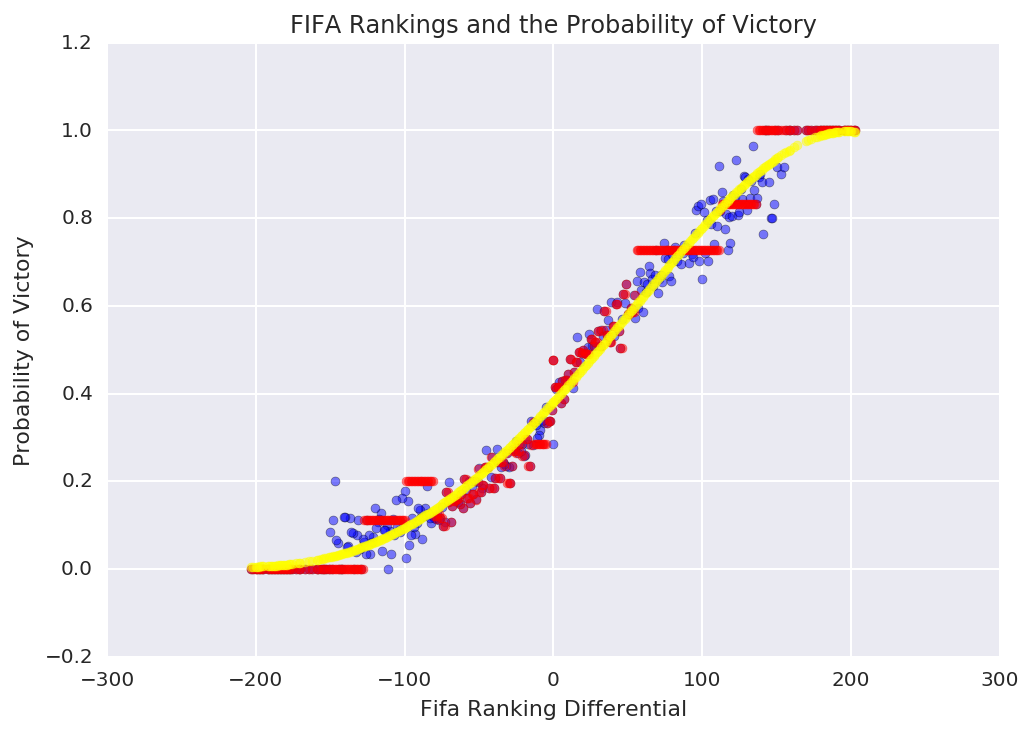

In [62]:
test_data_1 = log_regress_1.predict(X_train)
test_data_2 =f(X_train)
plt.scatter(p_win1.rank_diff, p_win1.prob, alpha=0.5)
plt.scatter(p_win1.rank_diff, test_data_1, alpha=0.5, color='red')
plt.scatter(p_win1.rank_diff, test_data_2, alpha=0.5, color='yellow')
plt.xlabel('Fifa Ranking Differential');
plt.ylabel(u'Probability of Victory');
plt.title(u'FIFA Rankings and the Probability of Victory');
# plt.scatter(higher_rank_win.rank_diff_from_higher, higher_rank_win.prob, alpha=0.5)
# plt.scatter(lower_rank_win.rank_diff_from_higher*-1, lower_rank_win.prob, alpha=0.5)
# plt.scatter(X_train, test_data, alpha=0.5)
# plt.scatter(lower_rank_win.rank_diff_from_higher*-1, lower_rank_win.prob, alpha=0.5)

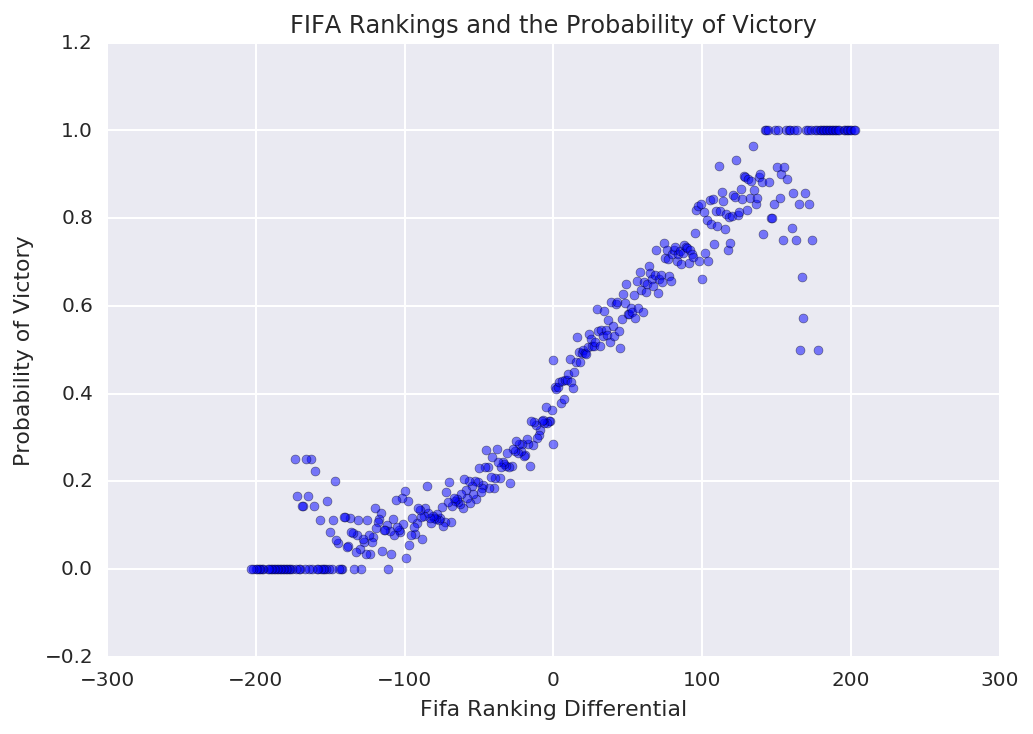

In [148]:
plt.scatter(higher_rank_win.rank_diff_from_higher, higher_rank_win.prob, alpha=0.5)
plt.scatter(lower_rank_win.rank_diff_from_higher*-1, lower_rank_win.prob, alpha=0.5)
plt.xlabel('Fifa Ranking Differential');
plt.ylabel(u'Probability of Victory');
plt.title(u'FIFA Rankings and the Probability of Victory');

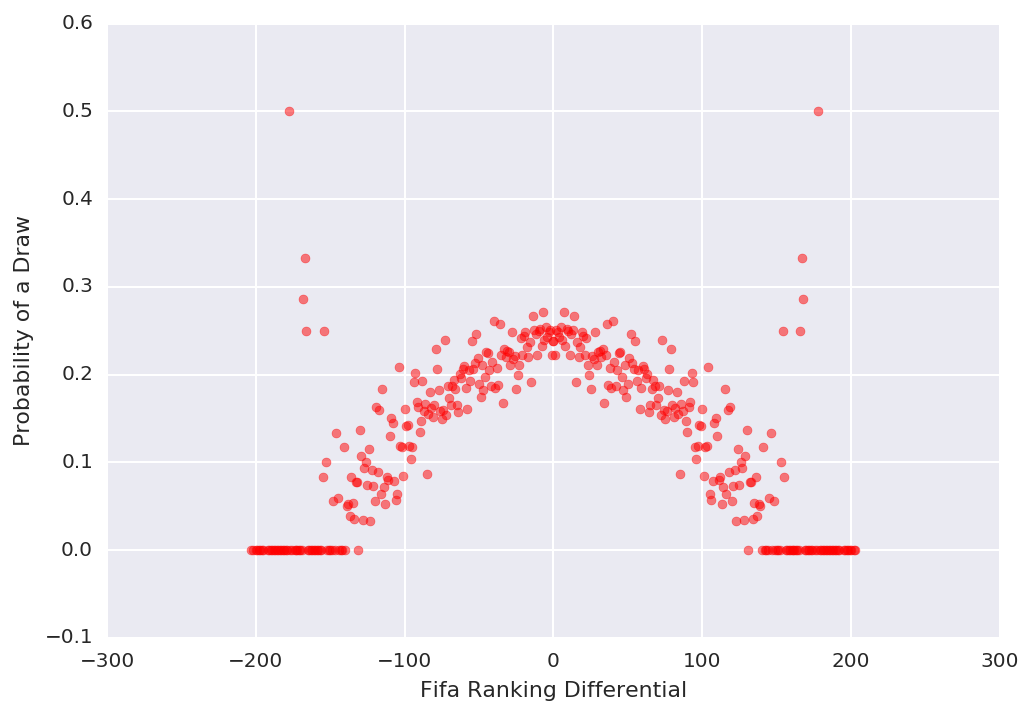

In [175]:
plt.scatter(draw.rank_diff_from_higher, draw.prob, alpha=0.5, color='red')
plt.scatter(draw.rank_diff_from_higher*-1, draw.prob, alpha=0.5, color='red')
plt.xlabel('Fifa Ranking Differential');
plt.ylabel(u'Probability of a Draw');

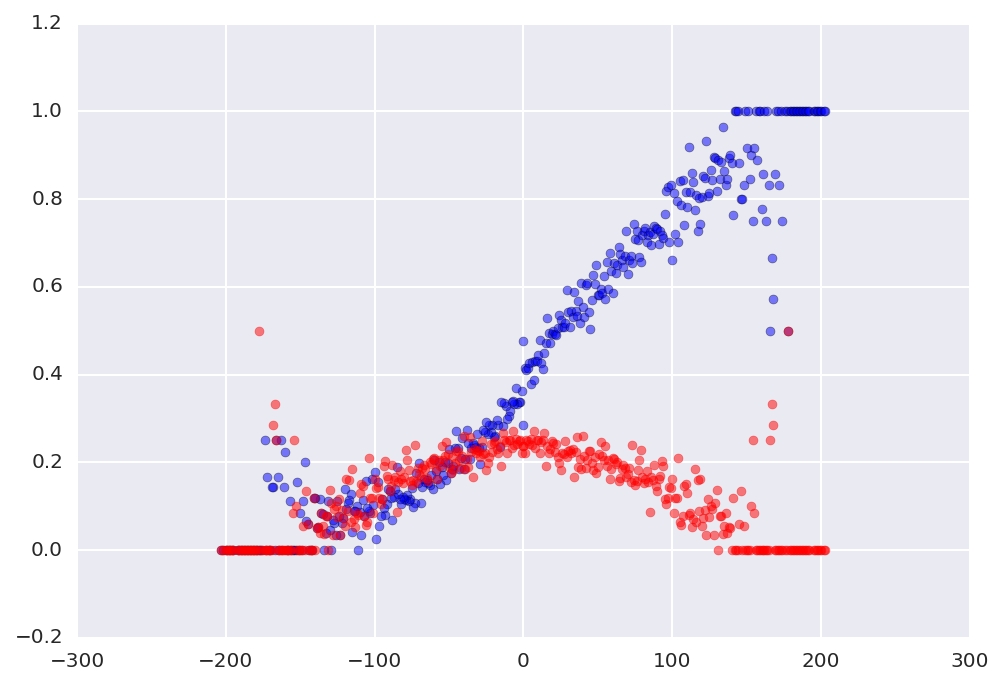

In [176]:
plt.scatter(higher_rank_win.rank_diff_from_higher, higher_rank_win.prob, alpha=0.5)
plt.scatter(lower_rank_win.rank_diff_from_higher*-1, lower_rank_win.prob, alpha=0.5)
plt.scatter(draw.rank_diff_from_higher, draw.prob, alpha=0.5, color='red')
plt.scatter(draw.rank_diff_from_higher*-1, draw.prob, alpha=0.5, color='red')

In [12]:
df_fifa_rankings.groupby('country_code').get_group('ARG')

,country,country_code,ranking,points,prev_points,prev_rank,confederation,pts_avg_1,pts_avg_wgt_1,pts_avg_2,pts_avg_wgt_2,pts_avg_3,pts_avg_wgt_3,pts_avg_4,pts_avg_wgt_4
date,,,,,,,,,,,,,,,
1993-08-01,Argentina,ARG,5,0(0),51,5,CONMEBOL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1993-09-23,Argentina,ARG,12,0(0),56,-7,CONMEBOL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1993-10-22,Argentina,ARG,9,0(0),55,3,CONMEBOL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1993-11-19,Argentina,ARG,9,0(0),55,0,CONMEBOL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1993-12-23,Argentina,ARG,8,0(0),55,1,CONMEBOL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1994-02-15,Argentina,ARG,9,0(0),55,-1,CONMEBOL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1994-03-15,Argentina,ARG,8,0(0),55,1,CONMEBOL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1994-04-19,Argentina,ARG,10,0(0),55,-2,CONMEBOL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1994-05-17,Argentina,ARG,6,0(0),54,4,CONMEBOL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [178]:
draw_df = pd.DataFrame()
draw_df['rank_diff'] = draw.rank_diff_from_higher
draw_df['prob'] = draw.prob
draw_df.to_csv('prob_draw.csv')

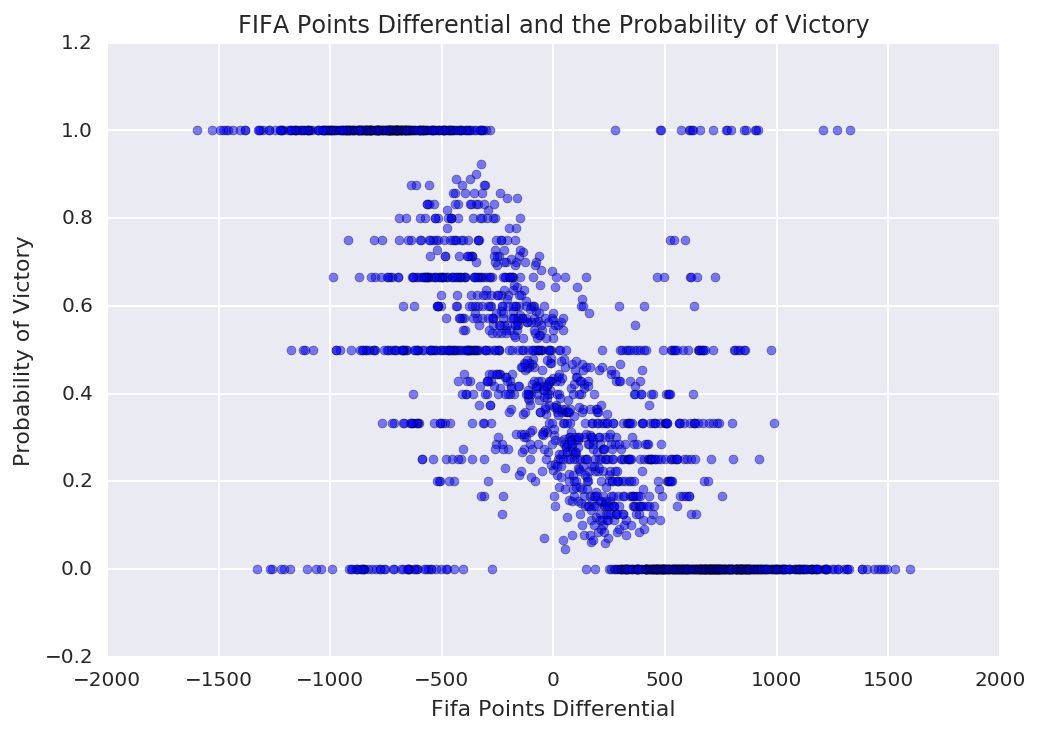

In [155]:
ranking_w_pct = df_match_rank.groupby('pts_diff_from_higher').higher_rank_res.value_counts(normalize=True).to_frame()

df1 = ranking_w_pct.unstack(level=0)
df1 = df1.unstack().fillna(0).reset_index()
df1 = df1.drop('level_0', axis=1)

df1.columns = [u'pts_diff_from_higher', u'higher_rank_res', 'prob']
higher_pts_win = df1[df1['higher_rank_res']=='W']
lower_pts_win = df1[df1['higher_rank_res']=='L']
draw = df1[df1['higher_rank_res']=='D']

plt.scatter(higher_pts_win.pts_diff_from_higher*-1, higher_pts_win.prob, alpha=0.5)
plt.scatter(lower_pts_win.pts_diff_from_higher, lower_pts_win.prob, alpha=0.5)
plt.xlabel('Fifa Points Differential');
plt.ylabel(u'Probability of Victory');
plt.title(u'FIFA Points Differential and the Probability of Victory');

##### Soccer investment
World soccer has seen significant investment, particularly in recent years. The additional resources has affected the sport in unique ways. This project attemtps to investigate these effects, in particular the effect on the FIFA World Cup.

Below is plot of the world record transfer fee paid between soccer clubs. The record transfer fee has increased over the years, however the exponential increase in the last few decades has been driven by the additional resources soccer clubs have obtained.

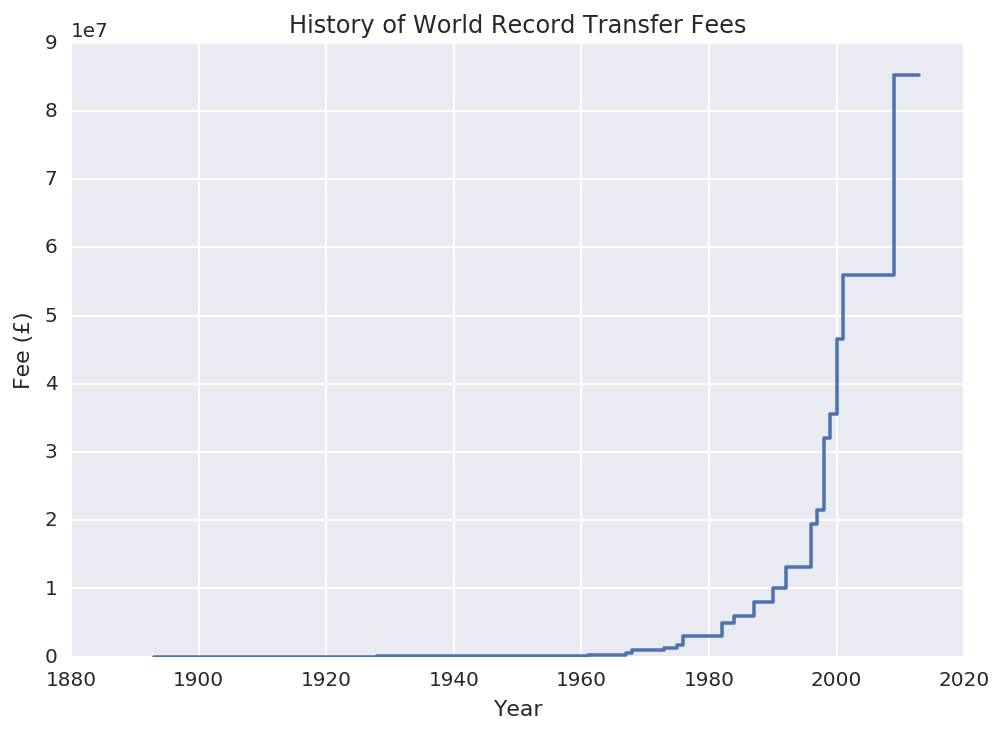

In [5]:
plt.plot(df_tranfer['year'], df_tranfer['fee_pounds'], linestyle='steps')
plt.xlabel('Year');
plt.ylabel(u'Fee (\u00A3)');
plt.title('History of World Record Transfer Fees');

# World Cup Performance and Soccer history
National teams the regularly qualify for the World Cup are likely to have a strong soccer tradition. This tradition means children are likely to play soccer growing up, providing the nation with a larger pool of players to select from.

The average performance of a nation at the World Cup was compared to their qualification record for the tournament. A weak trend was observed where teams performed better when regularly qualified. This model needs refinement as nations such as Croatia may have less of a qualification record, but their time as a part of Yugoslavia should be included in their footballing tradition.

In [6]:
# league data
df_rank = pd.read_csv('wc_rankings.csv')
# Germany includes West (not East) Germany in their footballing history
df_rank = df_rank.replace(to_replace="West Germany", value="Germany")

team_avg_ranking = df_rank.groupby('team').ranking.mean().to_frame()
team_num_wc = df_rank.team.value_counts().head(50).to_frame()
        
df_team_rank = team_avg_ranking.join(team_num_wc)
df_team_rank = df_team_rank.dropna()

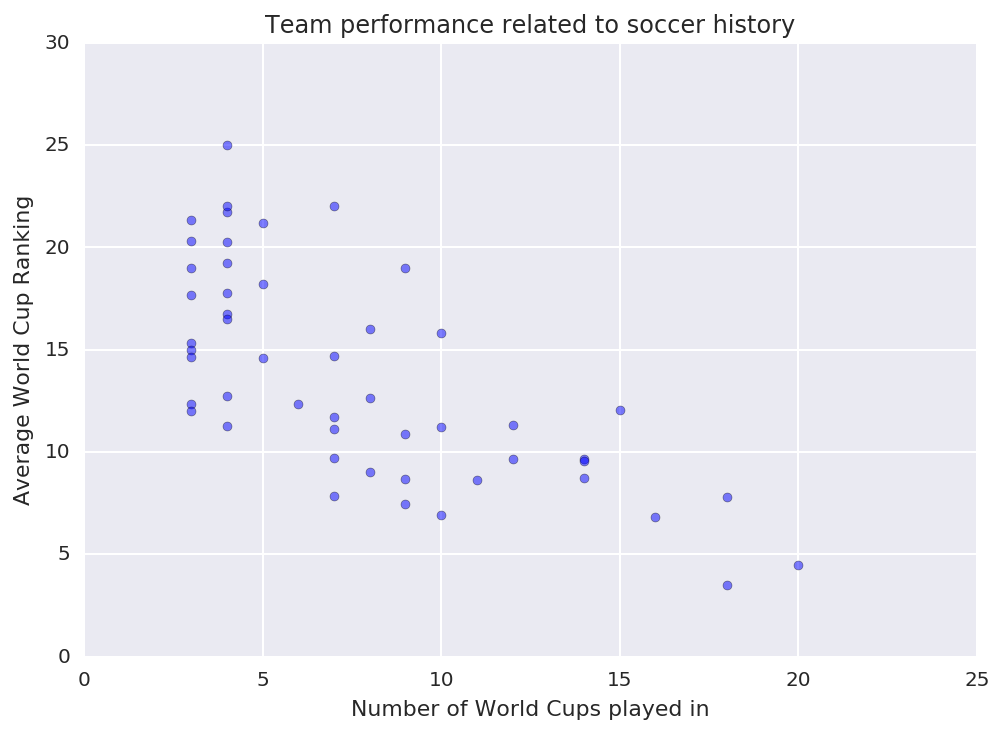

In [7]:
plt.scatter(df_team_rank.team, df_team_rank.ranking, alpha=0.5)
plt.xlabel('Number of World Cups played in');
plt.ylabel(u'Average World Cup Ranking');
plt.title('Team performance related to soccer history');

# The Best Professional Leagues
The quality of players available to a national team should be an important factor in a team's performance at the World Cup. The resources available to soccer clubs means the best players play in the best professional leagues, if the transfer market is efficient. Given an efficient market, the best leagues should be the most represented at the World Cup.

The index below is a ratio of the number of players at the World Cup from a given league to the average squad size for the World Cup. As expected, the top 10 leagues are mainly found in Western Europe, with the top 5 in England, Spain, Germany, Italy, and France. This is consistent with other metrics used for league comparisons.

In [8]:
df_squads = pd.read_csv('wc_squads.csv')
df_squads = df_squads.replace(to_replace="Korea Republic", value="South Korea")
df_squads = df_squads.replace(to_replace="West Germany", value="Germany")
df_squads = df_squads.replace(to_replace="Dutch East Indies (Indonesia)", value="Dutch East Indies")

grouped = df_squads.groupby('year') # Why groupby?
club_country = df_squads.club_country.unique()
club_country.sort()
df_clb_ctry = pd.DataFrame({"club_country":club_country})
df_clb_ctry = df_clb_ctry.set_index("club_country")

In [9]:
for year in df_squads.year.unique():
    country_to_club = grouped.club_country.value_counts()[year] / grouped.team.value_counts()[year]
    df_clb_ctry = df_clb_ctry.join(country_to_club.to_frame(year))
    
df_clb_ctry = df_clb_ctry.fillna(0) # If NaN, country league not represented at the world cup
df_clb_ctry = df_clb_ctry.T

/Users/pierreb/.virtualenvs/datasci/lib/python2.7/site-packages/pandas/indexes/multi.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


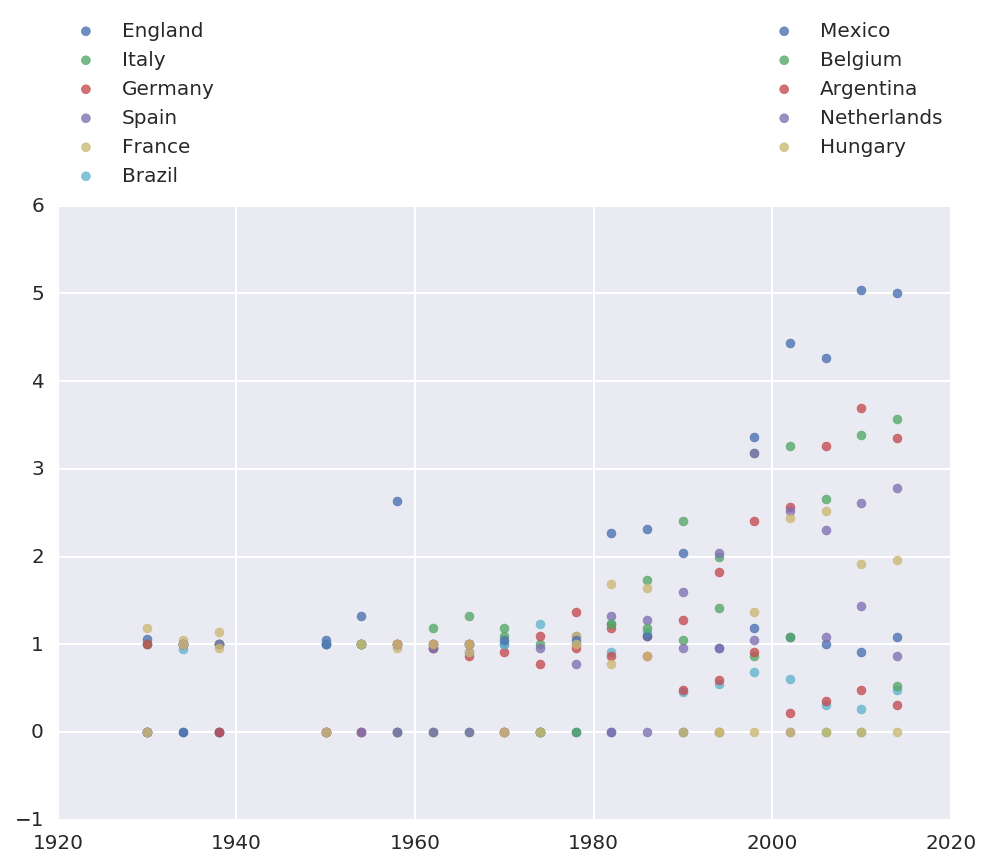

In [10]:
palette = itertools.cycle(sns.color_palette())
for num, country in enumerate(df_clb_ctry.sum().sort_values(ascending=False).head(11).index):
    plt.scatter(df_clb_ctry.index, df_clb_ctry[country], alpha=0.8, color=next(palette), label=country)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.);

# Do national teams benefit when their players are at the best professional clubs?

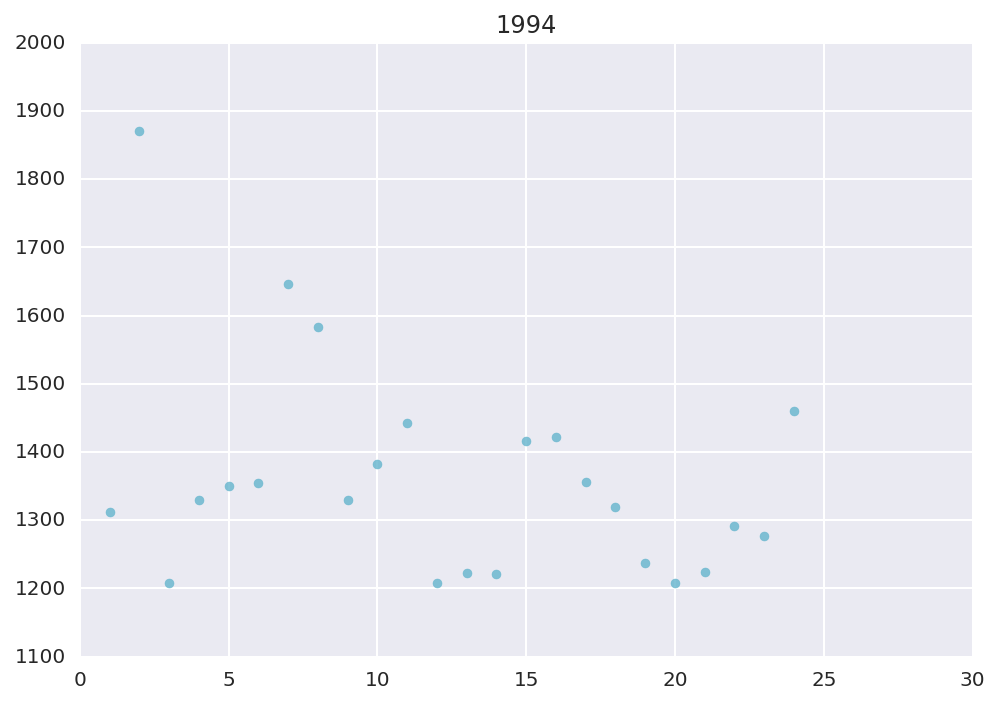

In [11]:
# palette = itertools.cycle(sns.color_palette())
# for year in range(1962,2015,4):
year = 1994
elo_clubs = df_club_elo[df_club_elo.year==year]
squads = df_squads[df_squads.year==year]
merged = pd.merge(squads, elo_clubs, on='club', how='left')
merged.elo = merged.elo.fillna(merged.elo.min()) # set unknown elo's to minimum
ranking = df_rank.groupby(['year', 'team']).ranking.mean()[year].to_frame()
elo = merged.groupby('team').elo.mean().to_frame()
team_rankings = pd.merge(ranking, elo, left_index=True, right_index=True)
plt.scatter(team_rankings.ranking.values, team_rankings.elo.values, alpha=0.8, color=next(palette), label=year)
plt.xlim(xmin=0);
plt.title(year);

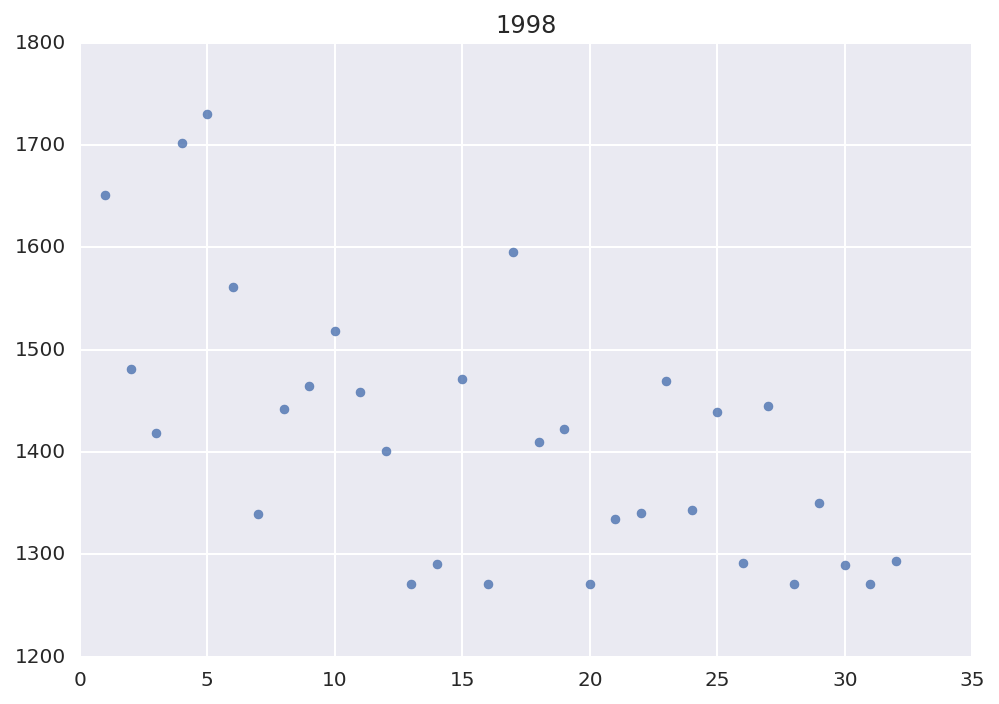

In [12]:
year = 1998
elo_clubs = df_club_elo[df_club_elo.year==year]
squads = df_squads[df_squads.year==year]
merged = pd.merge(squads, elo_clubs, on='club', how='left')
merged.elo = merged.elo.fillna(merged.elo.min()) # set unknown elo's to minimum
ranking = df_rank.groupby(['year', 'team']).ranking.mean()[year].to_frame()
elo = merged.groupby('team').elo.mean().to_frame()
team_rankings = pd.merge(ranking, elo, left_index=True, right_index=True)
plt.scatter(team_rankings.ranking.values, team_rankings.elo.values, alpha=0.8, color=next(palette), label=year)
plt.xlim(xmin=0);
plt.title(year);

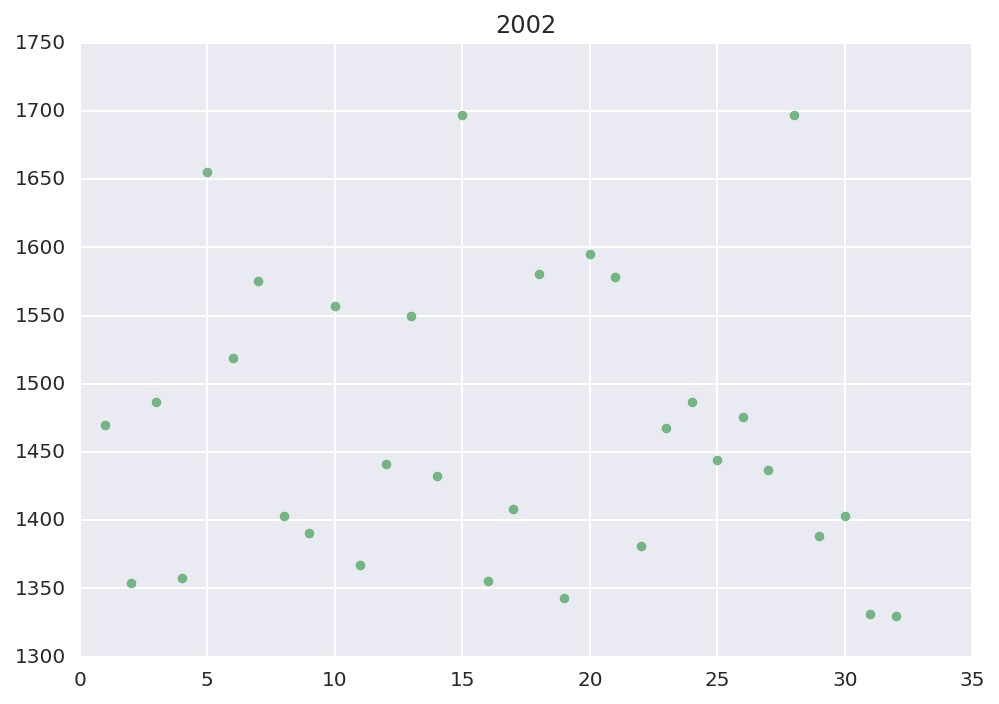

In [13]:
year = 2002
elo_clubs = df_club_elo[df_club_elo.year==year]
squads = df_squads[df_squads.year==year]
merged = pd.merge(squads, elo_clubs, on='club', how='left')
merged.elo = merged.elo.fillna(merged.elo.min()) # set unknown elo's to minimum
ranking = df_rank.groupby(['year', 'team']).ranking.mean()[year].to_frame()
elo = merged.groupby('team').elo.mean().to_frame()
team_rankings = pd.merge(ranking, elo, left_index=True, right_index=True)
plt.scatter(team_rankings.ranking.values, team_rankings.elo.values, alpha=0.8, color=next(palette), label=year)

plt.xlim(xmin=0);
plt.title(year);

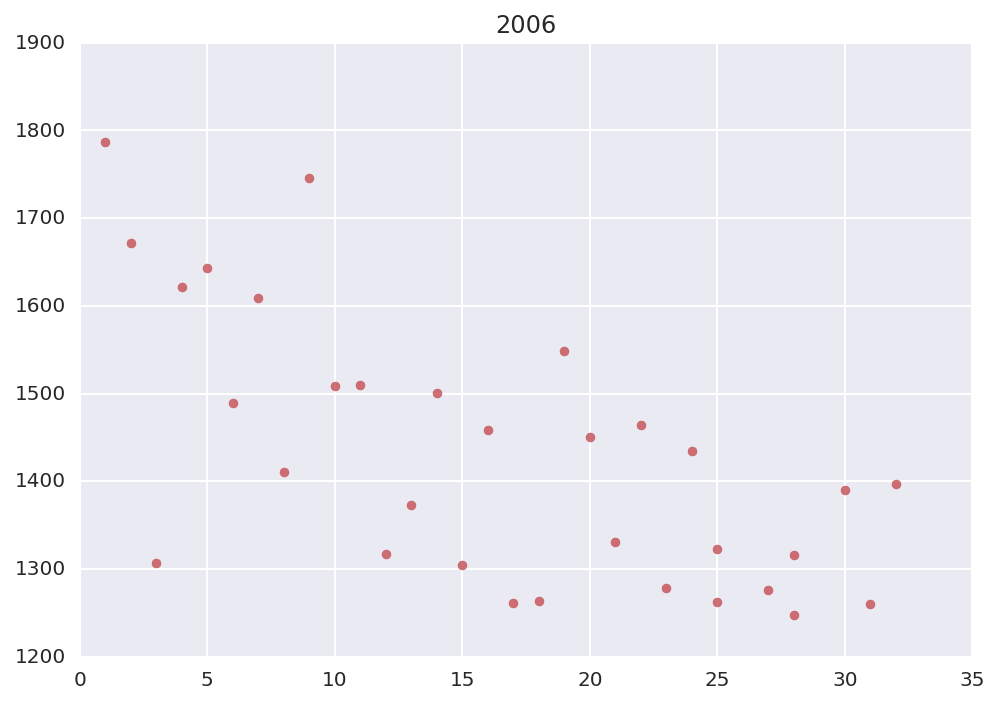

In [14]:
year = 2006
elo_clubs = df_club_elo[df_club_elo.year==year]
squads = df_squads[df_squads.year==year]
merged = pd.merge(squads, elo_clubs, on='club', how='left')
merged.elo = merged.elo.fillna(merged.elo.min()) # set unknown elo's to minimum
ranking = df_rank.groupby(['year', 'team']).ranking.mean()[year].to_frame()
elo = merged.groupby('team').elo.mean().to_frame()
team_rankings = pd.merge(ranking, elo, left_index=True, right_index=True)
plt.scatter(team_rankings.ranking.values, team_rankings.elo.values, alpha=0.8, color=next(palette), label=year)

plt.xlim(xmin=0);
plt.title(year);

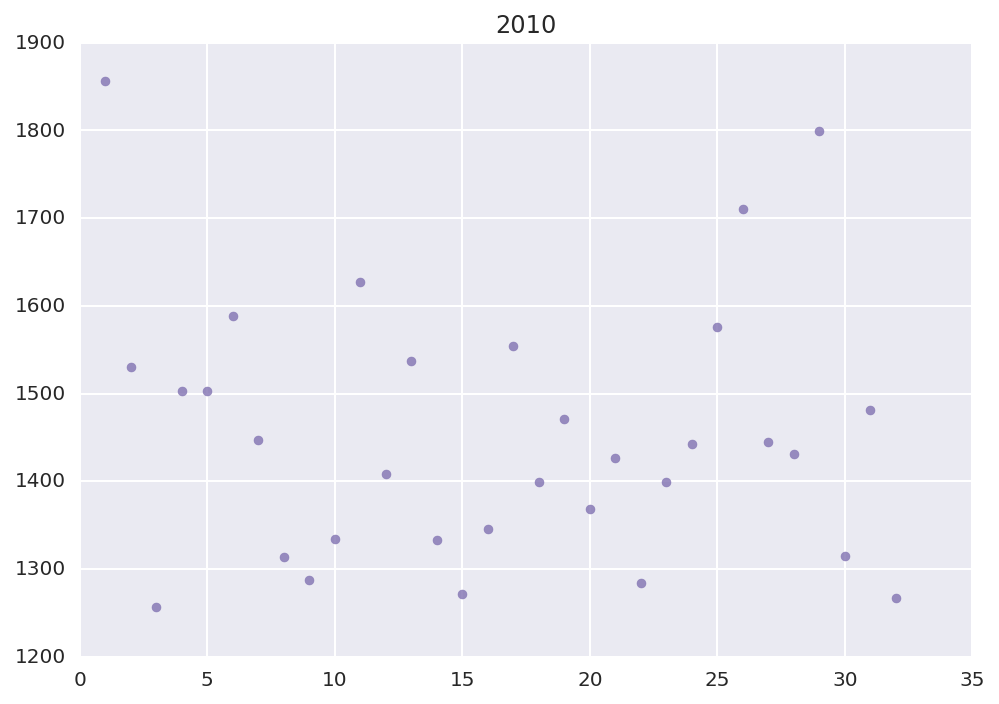

In [15]:
year = 2010
elo_clubs = df_club_elo[df_club_elo.year==year]
squads = df_squads[df_squads.year==year]
merged = pd.merge(squads, elo_clubs, on='club', how='left')
merged.elo = merged.elo.fillna(merged.elo.min()) # set unknown elo's to minimum
ranking = df_rank.groupby(['year', 'team']).ranking.mean()[year].to_frame()
elo = merged.groupby('team').elo.mean().to_frame()
team_rankings = pd.merge(ranking, elo, left_index=True, right_index=True)
plt.scatter(team_rankings.ranking.values, team_rankings.elo.values, alpha=0.8, color=next(palette), label=year)

plt.xlim(xmin=0);
plt.title(year);

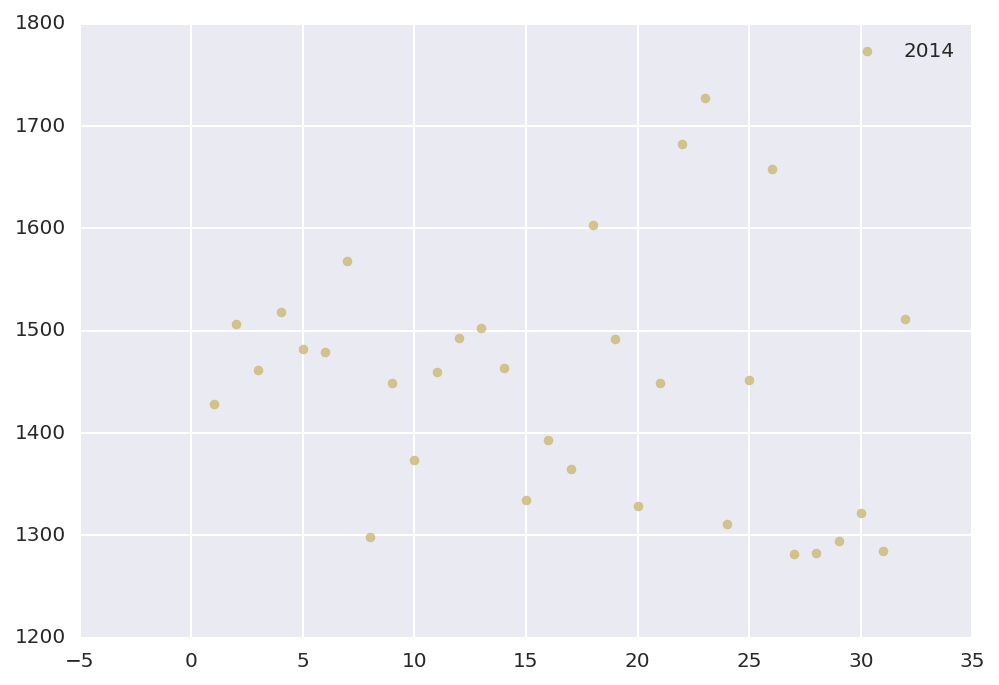

In [16]:
year = 2014
elo_clubs = df_club_elo[df_club_elo.year==year]
squads = df_squads[df_squads.year==year]
merged = pd.merge(squads, elo_clubs, on='club', how='left')
merged.elo = merged.elo.fillna(merged.elo.min()) # set unknown elo's to minimum
ranking = df_rank.groupby(['year', 'team']).ranking.mean()[2014].to_frame()
elo = merged.groupby('team').elo.mean().to_frame()
team_rankings = pd.merge(ranking, elo, left_index=True, right_index=True)
plt.scatter(team_rankings.ranking.values, team_rankings.elo.values, alpha=0.8, color=next(palette), label=year)

plt.legend();

# Nations with the most Expatriate Players in the top 5 leagues
A strong national league helps a nation develop its young players, providing them experience with better quality players. Nations with weaker national leagues depend on their players earning contracts with clubs in these leagues. These expatriate players are reguarly the leading players for a national team.

France had the most expatriate players of the top 5 leagues between 1995 and 2015. The expatriate players in the top 5 leagues from above between 1995 and 2015 shows the majority of these players came from Brazil and Argentina.

In [17]:
df_league_data = pd.read_csv("top_five_leagues.csv")
df_expats = df_league_data[df_league_data.nation!=df_league_data.nationality]

In [18]:
for season in df_expats.season.unique():
    nationality_expats = df_expats.groupby('season').nationality.value_counts()[season].head(10)
    nation_expats = df_expats.groupby('season').nation.value_counts()[season]

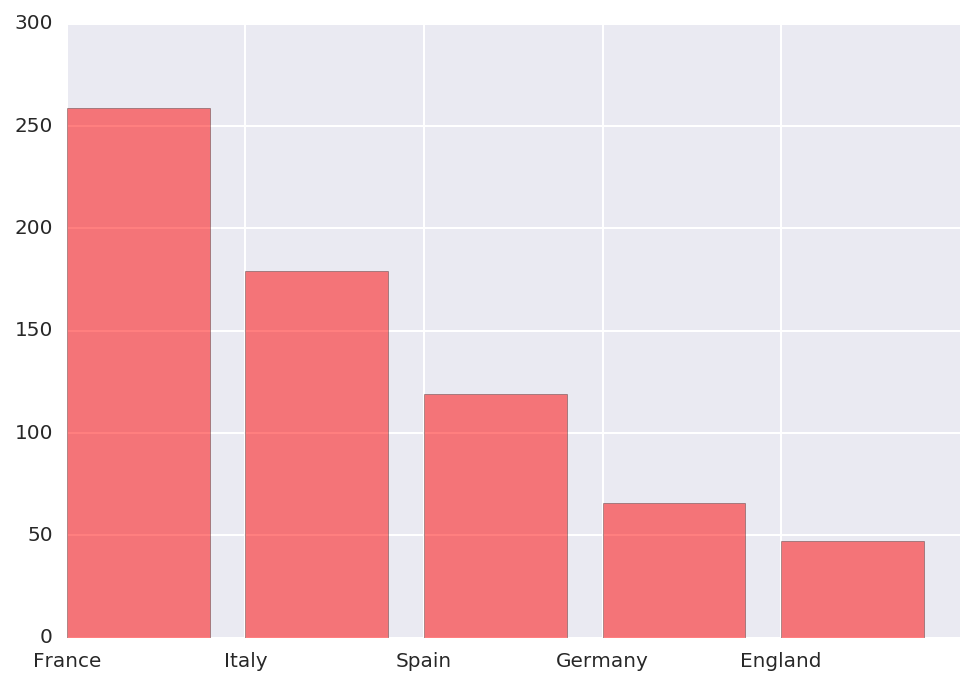

In [19]:
# bar plot nationality_expats
bar_plt = plt.bar(np.arange(5), nation_expats.values, color="red", alpha=0.5)
plt.xticks(np.arange(5), tuple(nation_expats.index));

# Expatirate players and World Cup performance
The presence of expatriate players in a World Cup squad was expected to be an indicator of a national team's performance at the World Cup. Players would not be purchased from a local league unless they were of sufficient quality. Below it is shown that there is not correlation between the percentage of a nation's players playing in other professional leagues and World Cup performance.

This model requires further refinement, as nations such as England and Spain have very few players playing outside their own national leagues, while Brazil has many players in other national leagues. This model currently does not account for the strength of the leagues that the players are playing in. The model above needs to be intergrated with this model to better understand the league data.

In [20]:
grouped = df_squads.groupby(["year","team"])

expat_players = []
for (yr, team), group in grouped:
    pct_local = sum(group.club_country.values==group.team.values)*1.0/group.club_country.count()
    expat_players.append([yr, team, 1 - pct_local])

df_pct_expats = pd.DataFrame(expat_players, columns=['year', 'team', 'pct_expat'])
df_expat_to_rank = df_pct_expats.merge(df_rank, on=['year', 'team'])

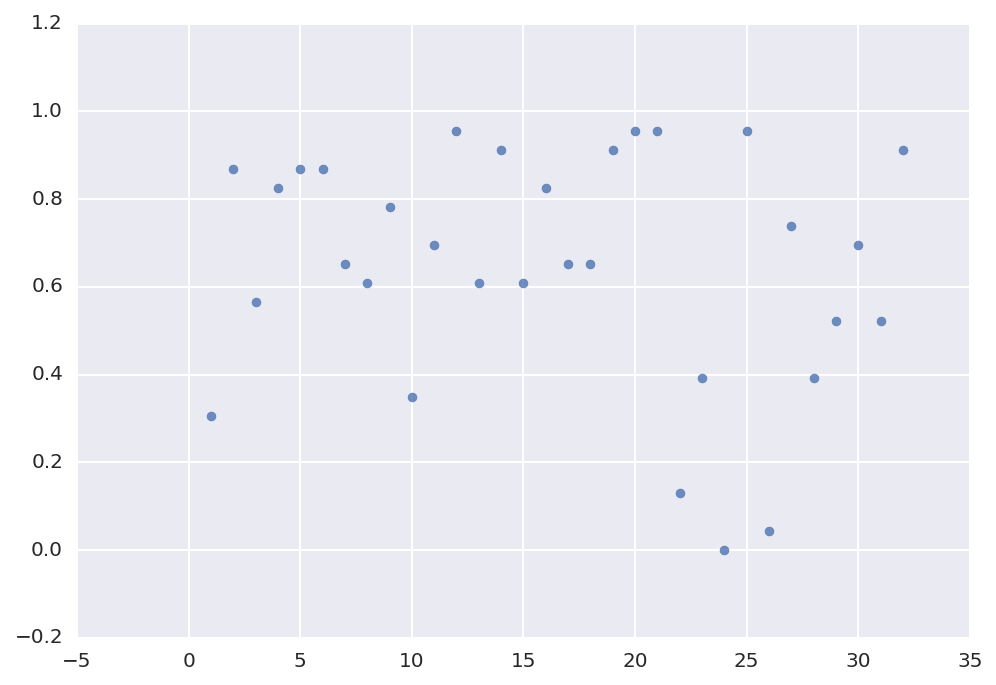

In [21]:
palette = itertools.cycle(sns.color_palette())
for year, group in df_expat_to_rank.groupby('year'):
    if year==2014:
        plt.scatter(group.ranking, group.pct_expat, alpha=0.8, color=next(palette))

# Player information
The quality of players in World Cup squads are expected to have the greatest effect on tournament performance. This section attempts to distil player effects. This started with an interesting study on the NHL showing their bias for players born in the first quarted of the year. This was due to children playing in age groups, so children born in the first quarter were on average a bit taller, bigger, and faster than the rest. This led to these children having more training and game time, better preparing them for professional sports.

Investigating this for World Cup players shows a larger number of players born in the first quarter, but not sufficient enough to confirm a bias. Breaking down individual World Cups shows variation in the highest represented birth months. A better way to test player biases would be to consider professional league data, where data can be observed annually as opposed to quadrennially with World Cup data.

In [22]:
# Create a mapping of month number to string abbreviation
month_map = {k: v for k,v in enumerate(calendar.month_abbr)}

# convert date of birth column to datetime
df_squads.dob = pd.to_datetime(df_squads.dob) 
# extract player birth month number
df_squads['birth_month'] = df_squads.dob.map(lambda x: x.month) 

In [23]:
df_mths_by_year = {}
# create data from of birth month data
df_mth = df_squads.birth_month.value_counts().sort_index() 
# convert birth month number to month ("01" to "Jan"'")
df_mth.index = df_mth.index.map(lambda x: month_map[x])
df_mth = df_mth.to_frame()
df_mth.columns = ['num_plyrs']
df_mth['year'] = 'All'

frames = [df_mth]
for year, group in df_squads.groupby('year'):
    df_mth_yr = group.birth_month.value_counts().sort_index()
    df_mth_yr.index = df_mth_yr.index.map(lambda x: month_map[x]) 
    df_mth_yr = df_mth_yr.to_frame()
    df_mth_yr.columns = ['num_plyrs']
    df_mth_yr['year'] = year
    frames.append(df_mth_yr)

result = pd.concat(frames)

In [24]:
result[result.year==2014]

,num_plyrs,year
Jan,72,2014
Feb,78,2014
Mar,66,2014
Apr,61,2014
May,71,2014
Jun,61,2014
Jul,57,2014
Aug,58,2014
Sep,64,2014
Oct,48,2014


In [25]:
result[result.year==2010]

,num_plyrs,year
Jan,69,2010
Feb,64,2010
Mar,74,2010
Apr,57,2010
May,75,2010
Jun,61,2010
Jul,59,2010
Aug,48,2010
Sep,55,2010
Oct,57,2010


In [34]:
df_CC[df_CC['Short Name']=='Italy']

,Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
105,ITA,Italy,Italy,Italian Republic,IT,Euro,A simple multiplier is used to convert the nat...,Europe & Central Asia,High income: OECD,IT,...,Consolidated central government,Special Data Dissemination Standard Plus (SDDS+),2012. Population data compiled from administra...,NaN,"Income survey (IS), 2012",Yes,2010,2012.0,2014.0,2008.0


In [27]:
# Indicator Codes
# SP.URB.TOTL - Urban Population : good
# SP.URB.TOTL.IN.ZS - Urban population (% of total) : good
# SP.URB.GROW - Urban population growth (annual %) : good
# SP.RUR.TOTL - Rural Population : good
# SP.RUR.TOTL.ZS - Rural population (% of total) : good
# SP.RUR.TOTL.ZG - Rural population growth : good
# AG.LND.TOTL.K2 - Land area (sq. km) : good
# SE.ADT.LITR.ZS - Adult literacy rate, population 15+ years, both sexes (%) : sparse
# SE.ADT.LITR.FE.ZS - Female Adult Literacy Rate : sparse
# SM.POP.NETM - Net Migration : sparse by year
# NY.GDP.PCAP.CD - GDP per capita (current US$) : good
# NY.GDP.MKTP.KD.ZG - GDP growth (annual %) : good
# SP.POP.0014.TO.ZS - Population, ages 0-14 (% of total) : good
# SP.POP.1564.TO.ZS - Population, ages 15-64 (% of total) : good
# SE.XPD.TOTL.GD.ZS - Govt Expenditure on education % of total GDP # moderate
# SH.DYN.MORT - Mortality rate, under-5 (per 1,000) # good
# SP.DYN.IMRT.IN - Mortality rate, infant (per 1,000 live births) # good - infant is under 1
# SE.ADT.1524.LT.ZS - Youth literacy rate, population 15-24 years, both sexes (%) # sparse
# EG.ELC.ACCS.ZS - Access to electricity (% of population) # sparse by year
# EG.USE.PCAP.KG.OE - Energy use (kg of oil equivalent per capita) # moderate
# DT.ODA.ODAT.CD - Net official development assistance received (current US$) #good
# DT.TDS.DECT.EX.ZS - Total debt service (% of exports of goods, services and primary income) # good
# DT.DOD.DIMF.CD - Use of IMF credit (DOD, current US$) # good
# SP.DYN.LE00.IN - Life expectancy at birth, total (years) # good
# SP.DYN.IMRT.IN - Mortality rate, infant (per 1,000 live births) #good
# EG.USE.ELEC.KH.PC - Electric power consumption (kWh per capita) # good
# SL.UEM.TOTL.FE.ZS - Unemployment, female (% of female labor force) # good
# SL.UEM.TOTL.MA.ZS - Unemployment, male (% of male labor force) # good
# SL.EMP.VULN.FE.ZS - Vulnerable employment, female (% of female employment) # sparse
# SL.EMP.VULN.MA.ZS - Vulnerable employment, male (% of male employment) # sparse
# SL.UEM.LTRM.ZS - Long-term unemployment (% of total unemployment) # moderate
# SH.H2O.SAFE.UR.ZS - Improved water source, urban (% of urban population with access) # good
# SH.STA.ACSN.UR - Improved sanitation facilities, urban (% of urban population with access) # good
# SP.POP.TOTL.FE.ZS - Population, female (% of total) # good

df_WDI[df_WDI['Country Code']=='ENG'][df_WDI[df_WDI['Country Code']=='ENG']['Indicator Code']=='SP.POP.0014.TO.ZS']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


In [22]:
df_rank[df_rank.year==1966]

,year,ranking,team,group,played,win,draw,loss,goals_for,goals_against,goal_diff,points
105,1966,1,England,1,6,5,1,0,11,3,+8,11
106,1966,2,Germany,2,6,4,1,1,15,6,+9,9
107,1966,3,Portugal,3,6,5,0,1,17,8,+9,10
108,1966,4,Soviet Union,4,6,4,0,2,10,6,+4,8
109,1966,5,Argentina,2,4,2,1,1,4,2,+2,5
110,1966,6,Hungary,3,4,2,0,2,8,7,+1,4
111,1966,7,Uruguay,1,4,1,2,1,2,5,−3,4
112,1966,8,North Korea,4,4,1,1,2,5,9,−4,3
113,1966,9,Italy,4,3,1,0,2,2,2,0,2
114,1966,10,Spain,2,3,1,0,2,4,5,−1,2


In [28]:
# Investigate team average age
grouped = df_squads.groupby('year')
avg_age = df_squads.groupby('year').age.mean().to_frame()
# line plot avg_age.index vs avg_age.Age.values
# Possibly look at age and age variance by team, against team performance

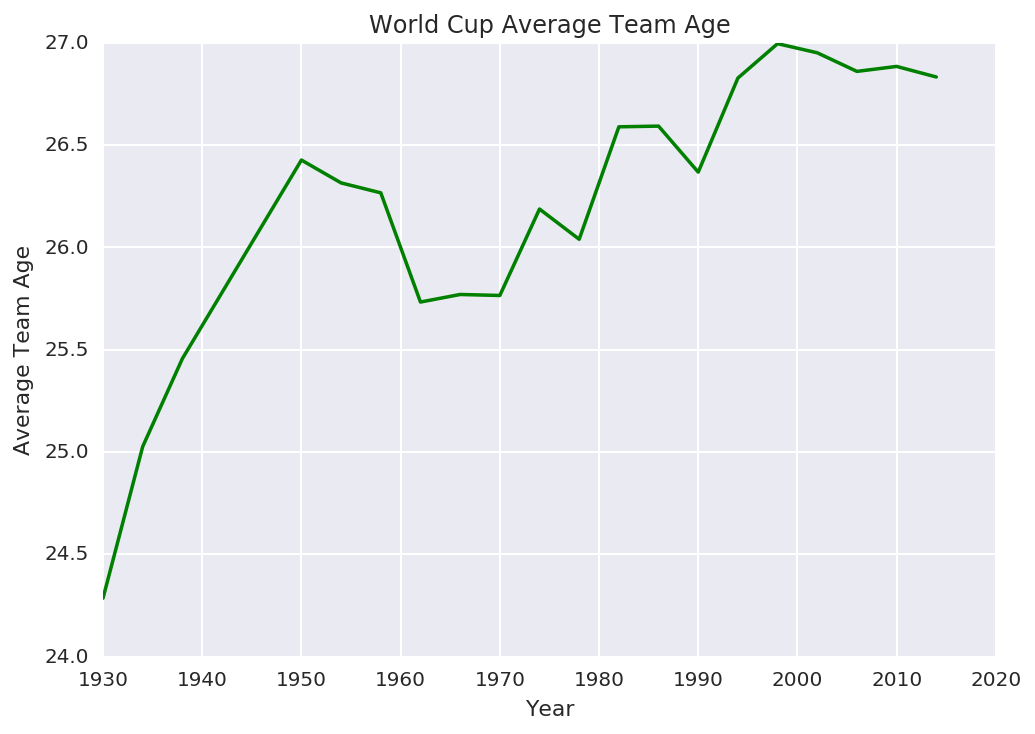

In [29]:
plt.plot(avg_age.index, avg_age.age.values, color='green')
plt.xlabel('Year');
plt.ylabel('Average Team Age');
plt.title('World Cup Average Team Age');

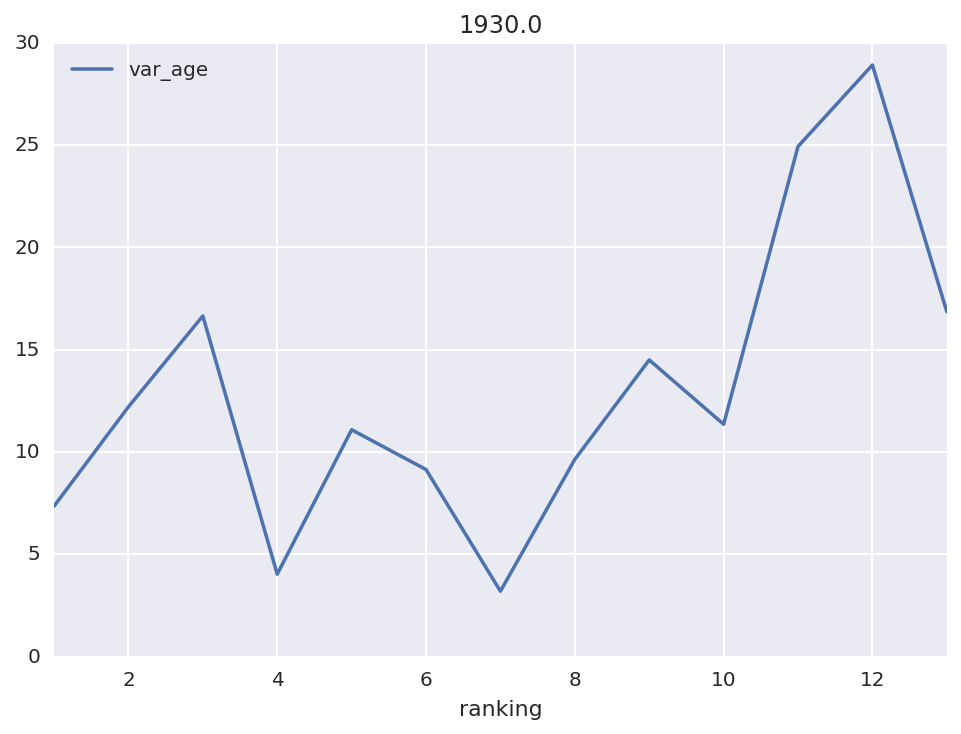

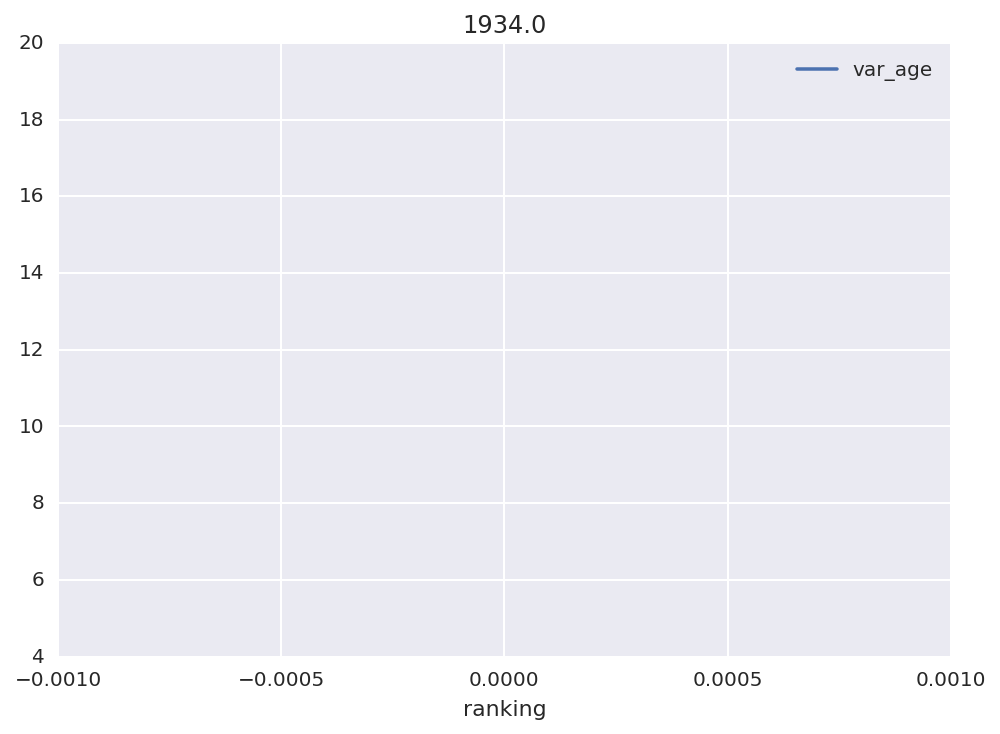

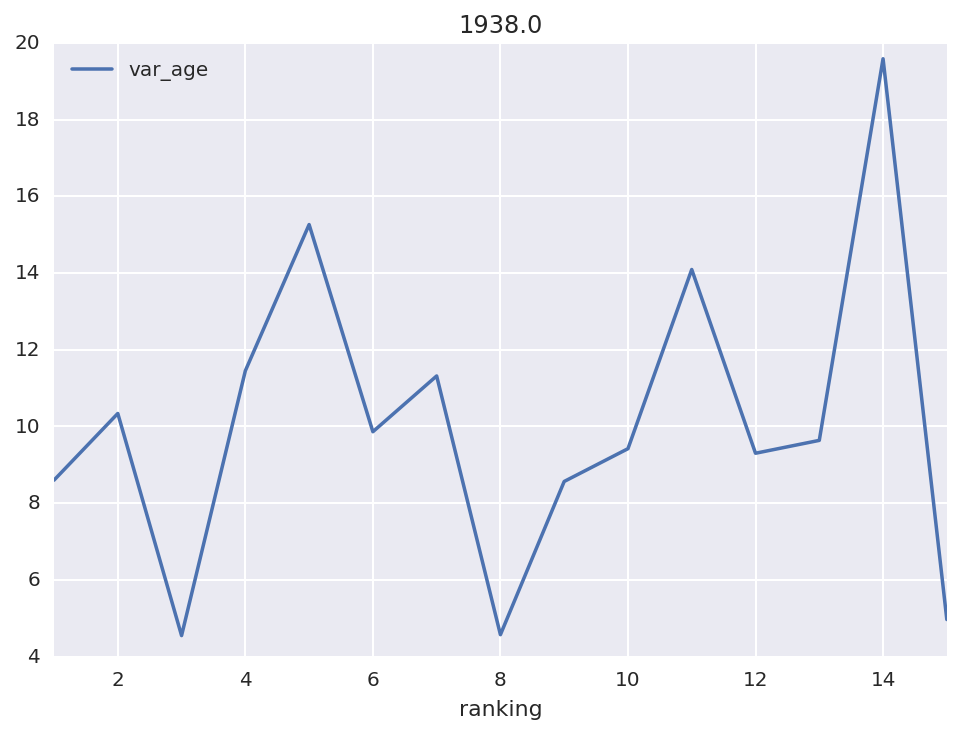

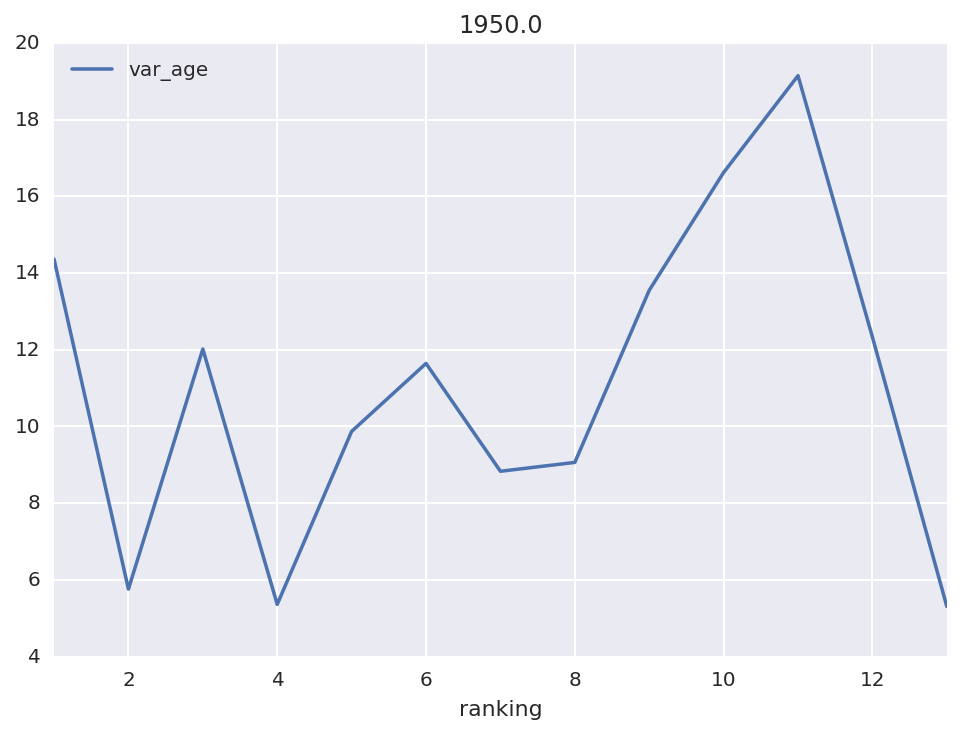

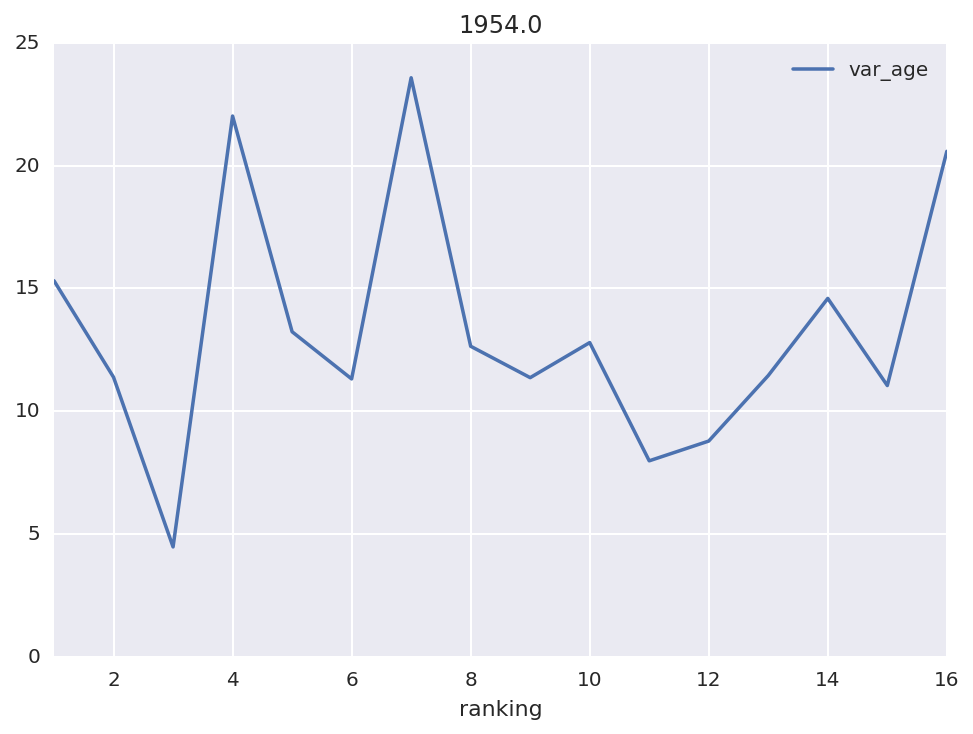

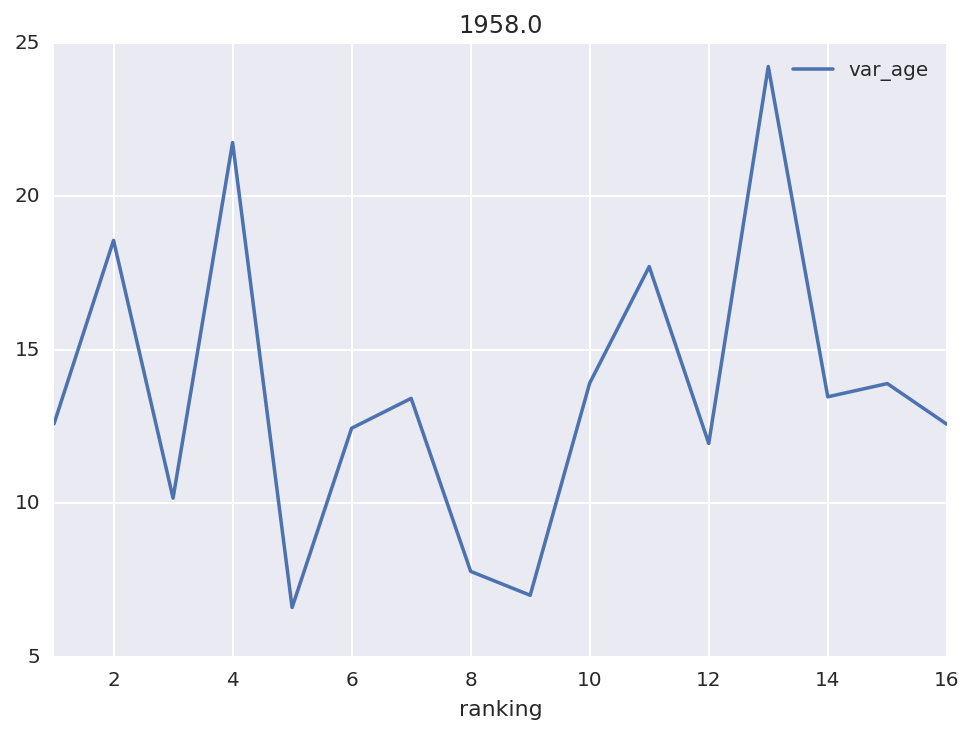

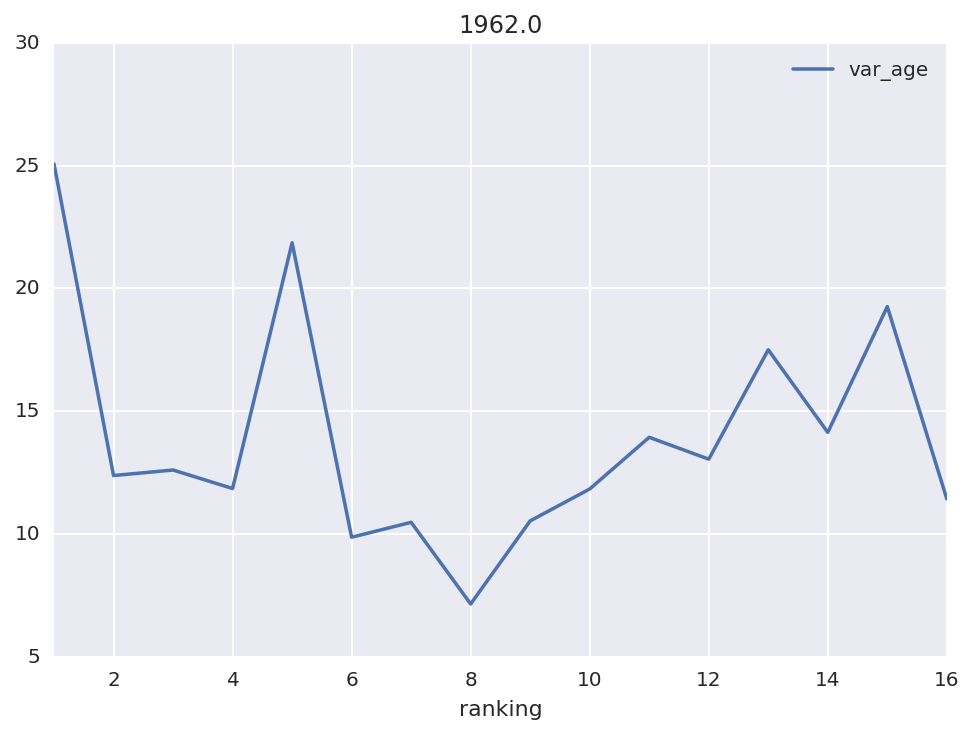

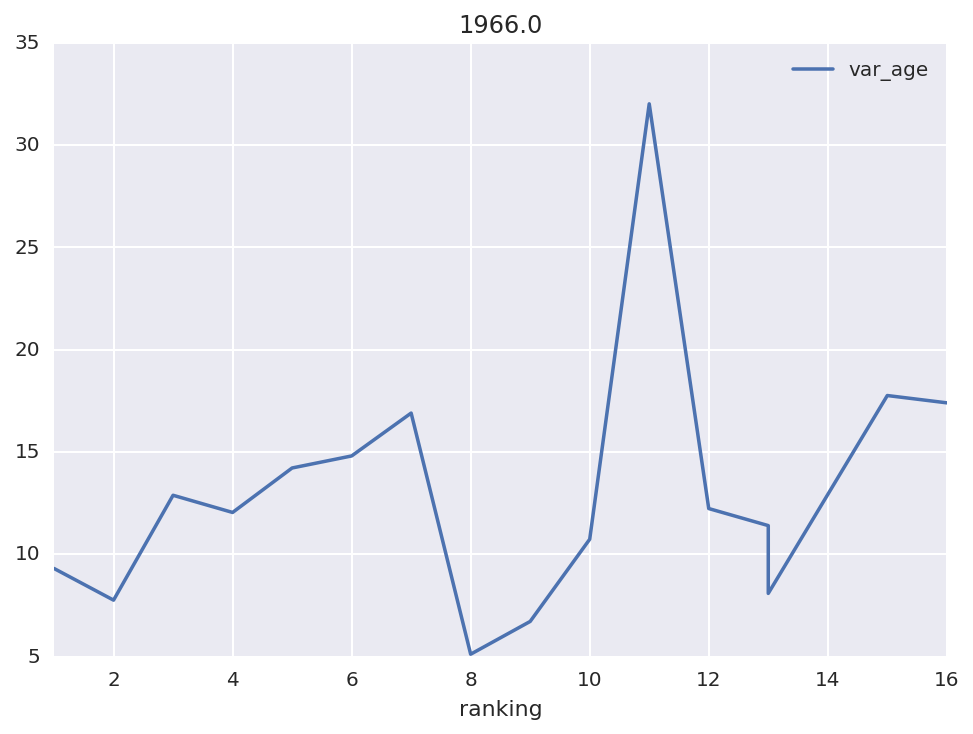

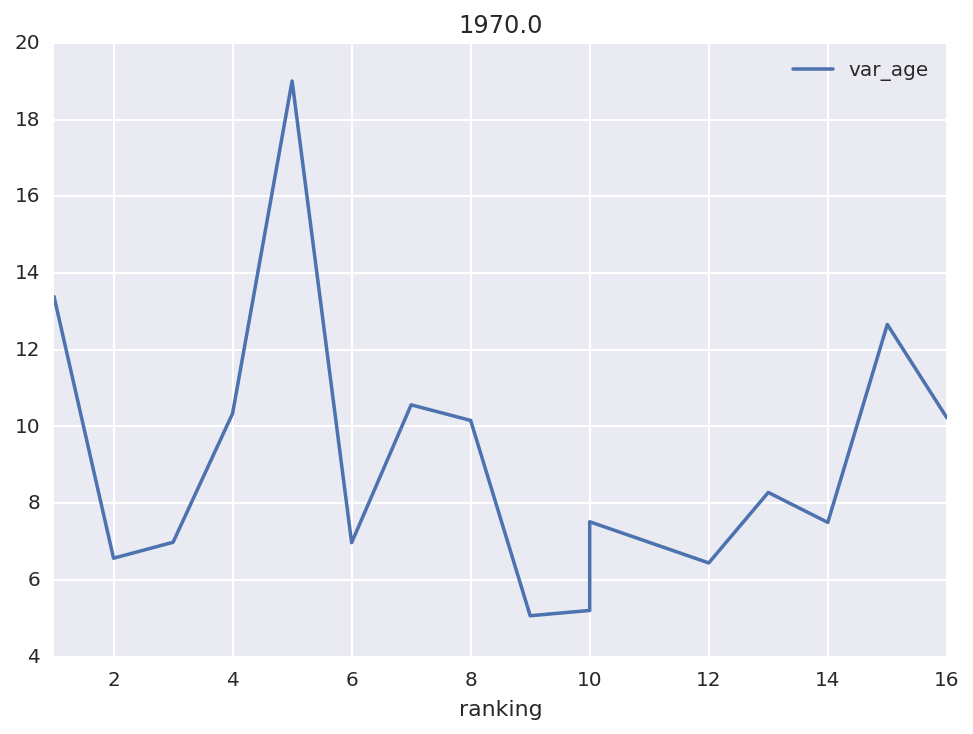

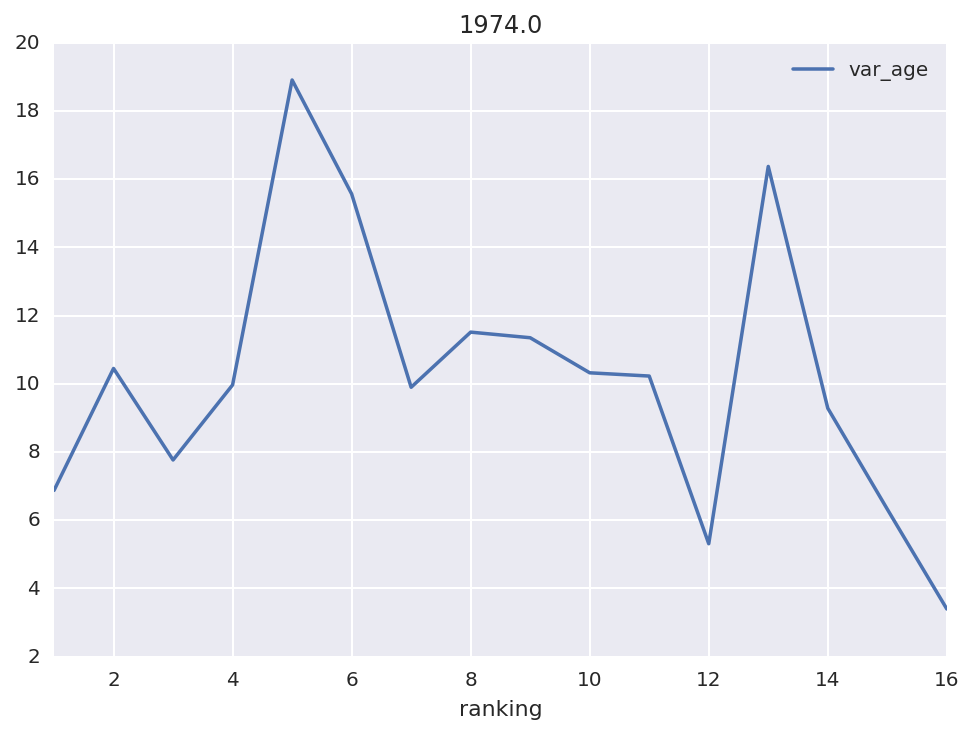

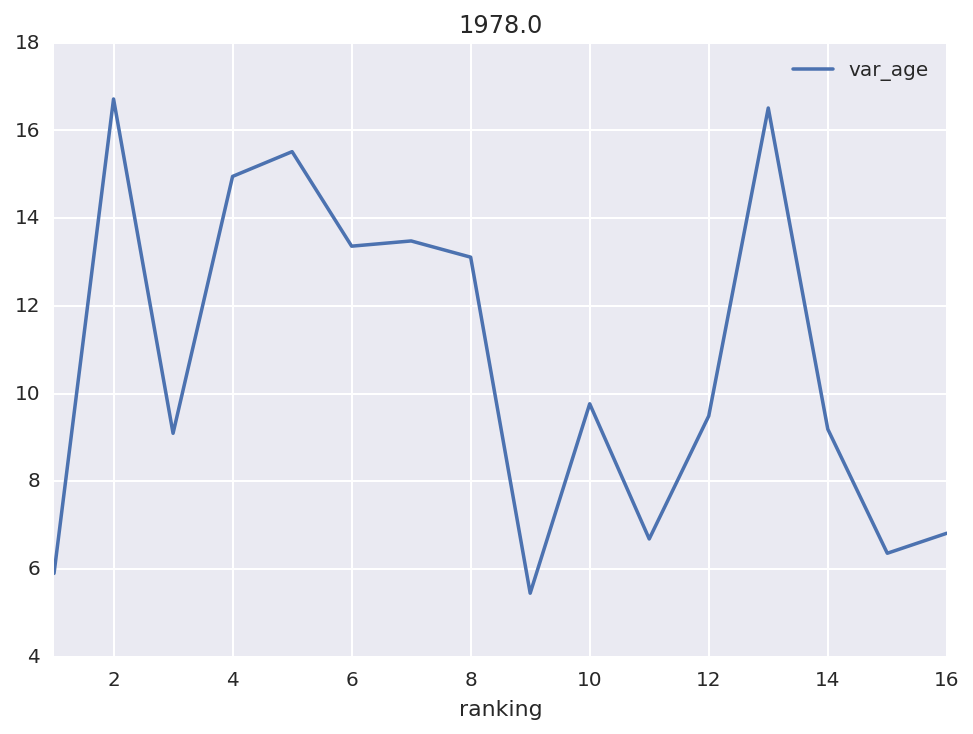

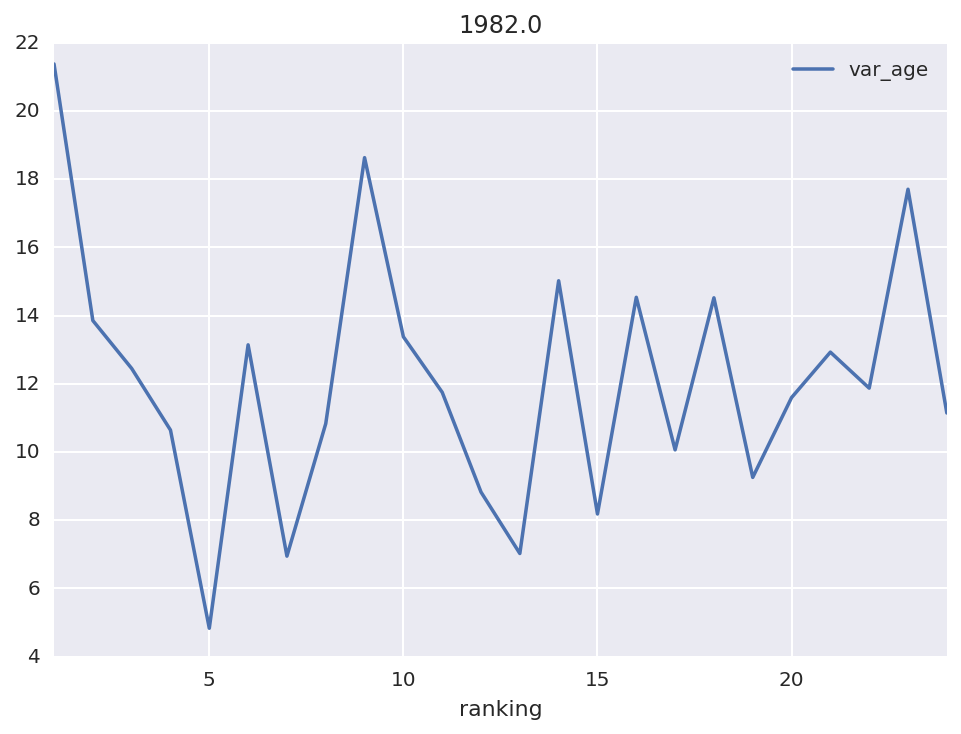

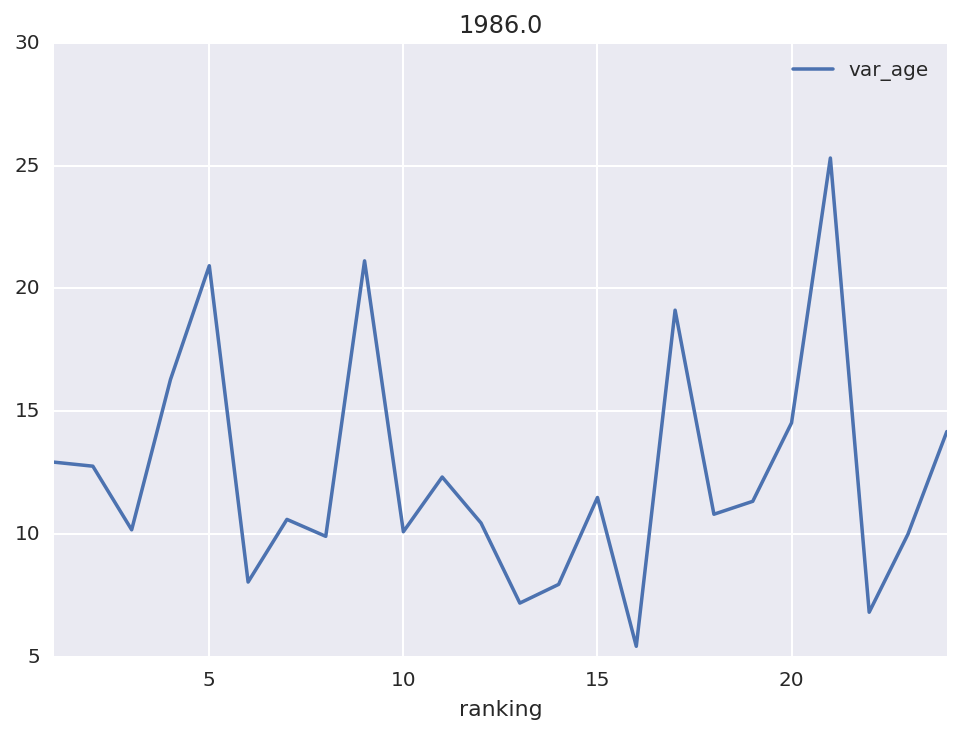

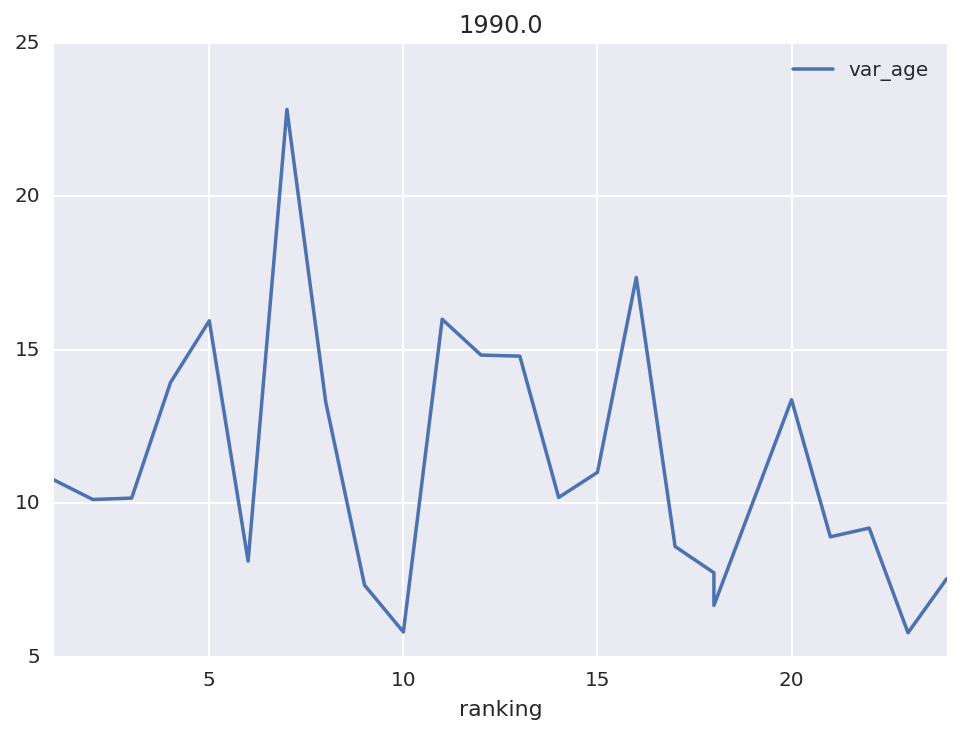

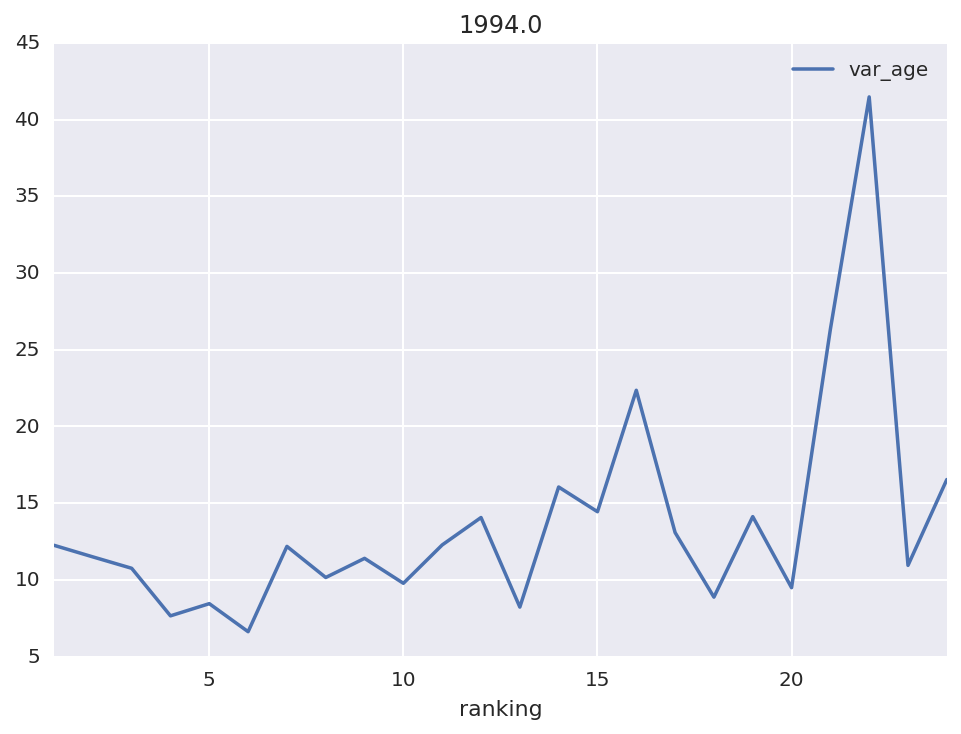

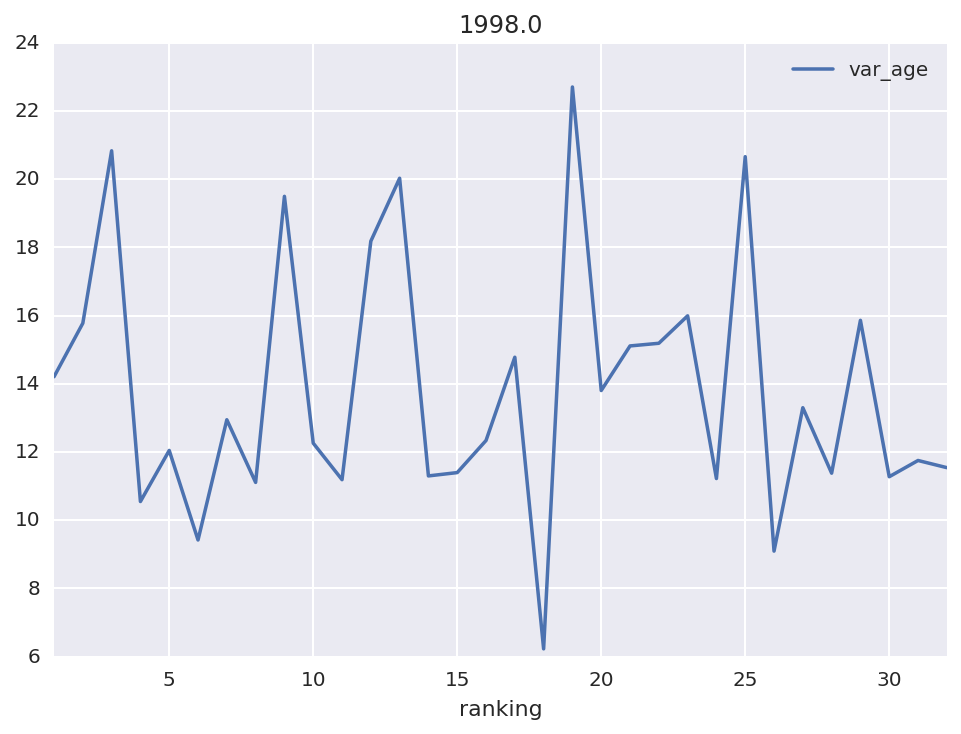

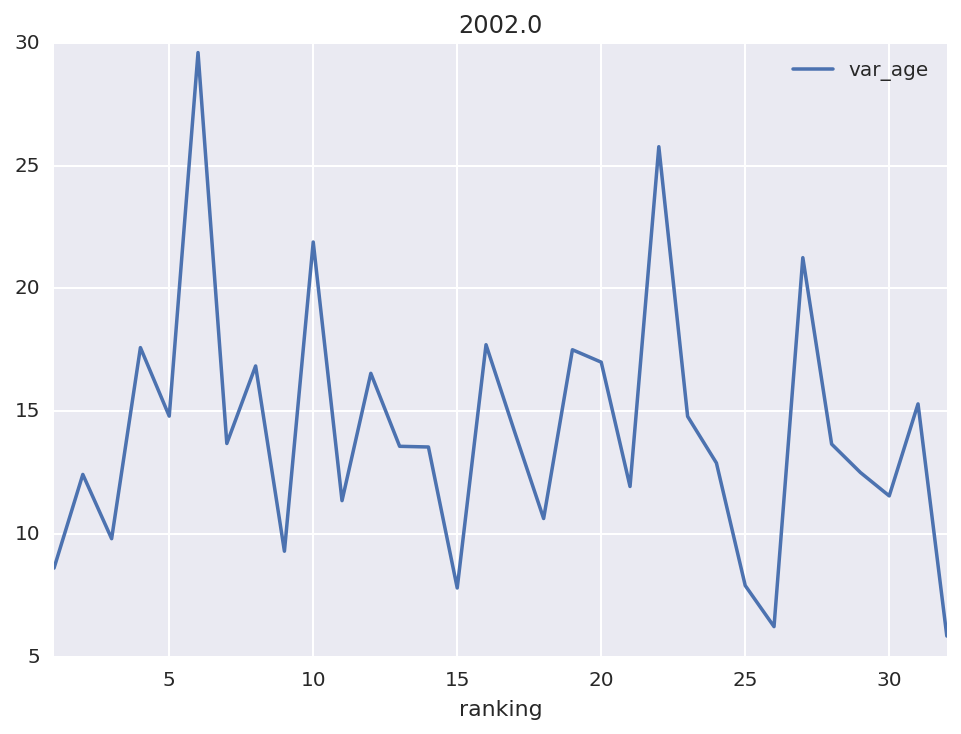

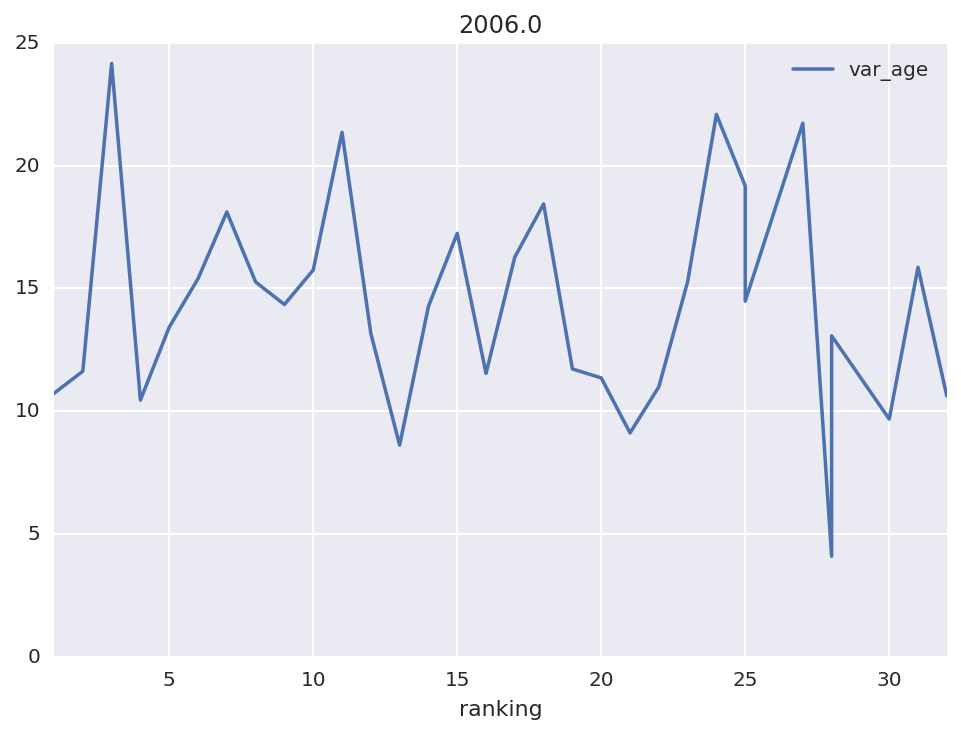

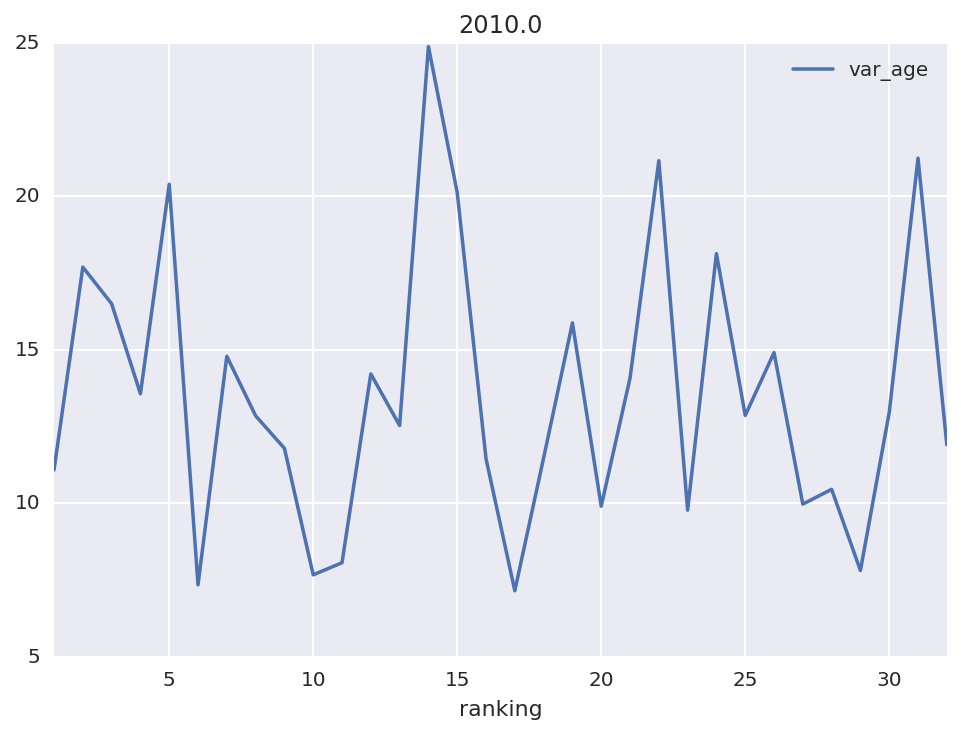

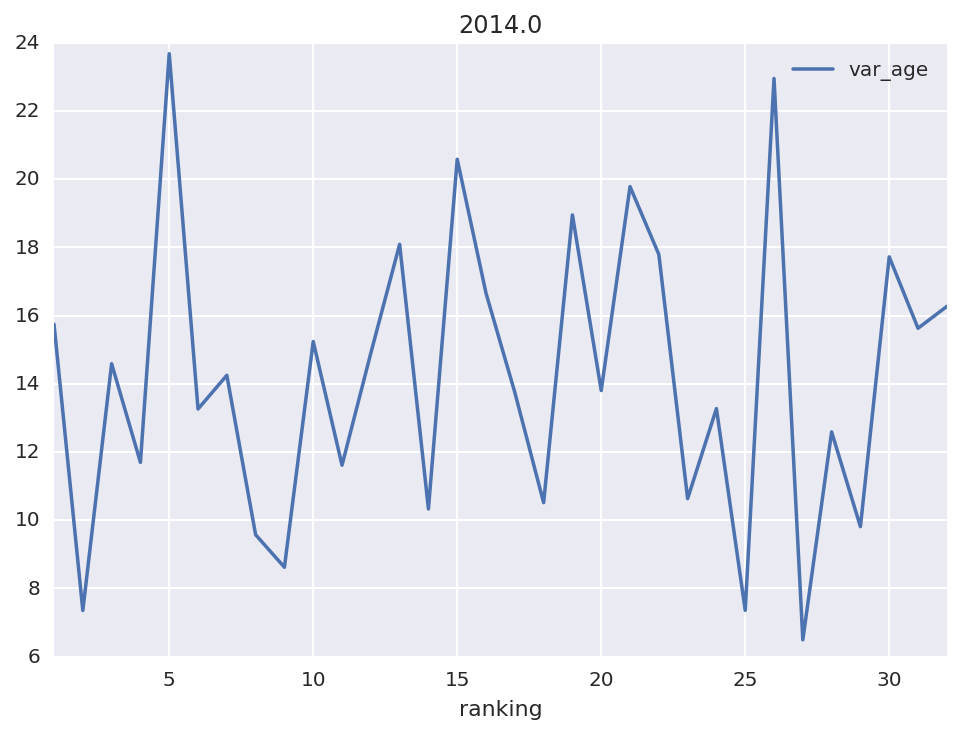

In [61]:
df_avg_age = df_squads.groupby(['year', 'team']).age.var().to_frame()
df_avg_age.columns = ['var_age']
df_rank_plyr_age = df_rank.join(df_avg_age, on=['year', 'team'], how="outer")
#grp_rank_age = df_rank_plyr_age.groupby('year')
for i, group in df_rank_plyr_age.groupby('year'):
    group.plot(x='ranking', y='var_age', title=str(i))
    plt.figure()
#df_avg_age#.replace(to_replace="West Germany", value="Germany").team.unique()

In [ ]:
for num, country in enumerate(df_clb_ctry.sum().sort_values(ascending=False).head(11).index):
    plt.scatter(df_clb_ctry.index, df_clb_ctry[country], alpha=0.8, color=next(palette), label=country)


In [39]:
print df_expats.season.unique()[0]
print df_expats.season.unique()[-1]

1993-94
2015-16
